<img src="line.png" style="float: left; margin: 20px;">


# WHO'S GOING DOWN?
---
## Predicting Relegation from the Premier League  
By Rajdut Basu Roy, September 2017

## Executive Summary

The aim is to predict relegation at the end of the season from features extracted from the number of games played to date, in effect the current league table. Model performance is assessed by the recall metric, the percentage of teams that end up being relegated that are classified as relegated.  

Models were benchmarked against the Bottom Three Model (the BTM), a simple model which predicts that the curent bottom three will be relegated at the end of the season. None of the models tested really bettered the BTM. Upsampling helped recall but at loss of precision. I also noticed that performance decreased as features were added. I believe this is due to overfitting resulting from the relatively small number of records compared to the number of features in the training set. This requires further investigation.

### Notes
The layout of this notebook follows the development of this project over time. There are three mains sections. The first contains the work with the initial feature set and some basic analysis. The second section builds on the first by adding to the features and performing the analysis to a greater depth. The third extends the analysis in Section Two by repeating it for all games in a season rather than a specified set. There is therefore some duplication of work across sections.

# SECTION ONE

## Initial Aim

Predict if a team will be relegated from the Premier League given the following feature set after n games played:

* Number of games won, drawn and lost
* Goals for and against
* Goal difference
* Number of points

NOTE: Position in table is not a feature in initial problem as teams may have played a different number by a particular date. To make sense of position we will need to know about the position of all other teams and the number of games they have played. In this situation the feature set will need to be the entire league table. 

Possible extentsions to Aims

* Add additional features such as half-time scores, number of corners etc
* Allow for actual team. For example, could add league position in previous years to the analysis **(added in Section 2)**
* Allow for current position in league table **(added in Section 2)**
* Allow for current form such as the won/drawn/lost record over the last five games **(added in Section 2)**
* Allow for change in manager

Further Aims

* Given the current league table, predict the outcome of future matches and therefore the final league table and relegated teams.


# Methods and Models

## Creation of features and target variables

### Data Sources

Various websites have historic results and league tables. League tables are nine times out of ten those at the end of the season.

* [football.db](http://openfootball.github.io)
* [football-data.co.uk](http://www.football-data.co.uk/data.php)
* [soccerbase.com](http://www.soccerbase.com)
* [The Rec.Sport.Soccer Statistics Foundation](http://www.rsssf.com)
* [The Offical Premier League website](https://www.premierleague.com/home)

I found football-data.co.uk to be the best site. Consistent format and easy to parse .csv files from season to season. It also contains additional information that could extend the feature set (e.g. half-time scores, number of corners and betting odds for recent seasons). Downside is that games are ordered by date and not by 'round' as on some other sites. If a league game is postponed because of cup or international commitments the postponed game is recorded with all other games for that round. This would make it easy to create a league table in which all teams will have played n games. However, I don't believe this is a pressing issue as, in real life, the table does not operate like this. It's based on games actually played and there is no retrospective adjustment for postponed games.

**Issues:** football-data.co.uk does not contain results for the first Premier League season, the 1992/93 season. Results will need to be obtained from another source.

**Solution:** Ignore 1992/93 in first pass of analysis

### Target variables

Create the final league table from the results of the games played in that season. The bottom three teams are those relegated.

### Feature variables

Create an artificial league table that represents each team's first n results. This league table will have all the features listed above.

### Train / test split and hold out data

Data will be for seasons 1995/96 to 2016/17 in pass one. I.e. the period when there were 20 teams in the league. Need to think more about the three previous seasons with 22 teams.

Not sure there is enough data for training, testing and holding out. Could hold out two seasons and cross-validate on the remainder for testing purposes.


### Modelling

This is a classification problem so look at the output from Logistic Regression, K Nearest Neighbours, Support Vector Machines, Decision Trees.

### Success Criteria

Greater accuracy than the baseline of three relegated from twenty teams. Confusion matrix etc.

## Risks and Assumptions

**Risk 1:** Project takes longer than expected   
**Mitigation 1:** Work hard and front-end load the work

**Risk 2:** Unable to obtain data  
**Mitigation 2:** Data is readily available, although in different formats, so this is not an issue

**Risk 3:** The baseline for relegated teams is 3/20 or 15%. How will this class imbalance affect the modelling?  
**Mitigation 4:** Investigate oversampling and undersampling techniques

**Risk 4:** Correlation between feature variables  
**Mitigation 4:** Perform PCA in pass two of analysis


## Relevant Premier League Facts

* 1992/93 was the first season
* There were 22 teams in the Premier League until the 1995/96 season in which the number of teams was reduced to 20
* Each year the bottom three teams are relegated and three teams are promoted from the division below. The exception was the 1994/95 season in which four teams were relegated and only two were promoted from the division below
* Position in table is based on points, then goal difference, then goals for and are then tied

## Model Layout

-[Load Data](#load_data)

To Be Completed

### Import all libraries that will be used in this project

In [11]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import urllib
import json
import seaborn as sns

%matplotlib inline

In [2]:
!pwd

/Users/rajabr/DSI-LDN-3/project-submissions/rajabr/capstone


### Download all files from football-data.co.uk

In [ ]:
# Instantiate URLopener and set root of URL
# example URL http://football-data.co.uk/mmz4281/9394/E0.csv
# E0 stands for the top division in England. E1 would be the second tier etc

csvfile = urllib.URLopener()
url_root="http://football-data.co.uk/mmz4281/"

In [ ]:
# Download and save game results for all complete seasons on football-data.co.uk for the top three tiers

for season_start_calyear in range(1993,2017):
    season=str(season_start_calyear)[-2:]+str(season_start_calyear+1)[-2:]
    url=url_root+season+'/E0.csv'
    filename='E0_'+season+'.csv'
    csvfile.retrieve(url, filename)
    url=url_root+season+'/E1.csv'
    filename='E1_'+season+'.csv'
    csvfile.retrieve(url, filename)
    url=url_root+season+'/E2.csv'
    filename='E2_'+season+'.csv'
    csvfile.retrieve(url, filename)

In [ ]:
# Check all files downloaded
!ls


### Investigate one season to see what we have ...

In [3]:
season_start_calyear=2005 # this can be changed to investigate other seasons
season=str(season_start_calyear)[-2:]+str(season_start_calyear+1)[-2:]
filename='E0_'+season+'.csv'

# read in the first 10 columns only - some seasons have extra commas at the end of rows which means more 
# data items then column headings
# get pandas to convert date string to dates. It's better than using split on '/' as some years are Y not y as expected
    
df=pd.read_csv(filename,usecols=range(10),parse_dates=[1],dayfirst=True)

### Format of the Raw Data File

In [4]:
# see notes.txt for details of column headings. A brief summary follows:
# Div = League Division
# Date = Match Date (dd/mm/yy)
# HomeTeam = Home Team
# AwayTeam = Away Team
# FTHG and HG = Full Time Home Team Goals
# FTAG and AG = Full Time Away Team Goals
# FTR and Res = Full Time Result (H=Home Win, D=Draw, A=Away Win)
# HTHG = Half Time Home Team Goals
# HTAG = Half Time Away Team Goals
# HTR = Half Time Result (H=Home Win, D=Draw, A=Away Win)
df.head(3).T

,0,1,2
Div,E0,E0,E0
Date,2005-08-13 00:00:00,2005-08-13 00:00:00,2005-08-13 00:00:00
HomeTeam,Aston Villa,Everton,Fulham
AwayTeam,Bolton,Man United,Birmingham
FTHG,2,0,0
FTAG,2,2,0
FTR,D,A,D
HTHG,2,0,0
HTAG,2,1,0
HTR,D,A,D


In [5]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 10 columns):
Div         380 non-null object
Date        380 non-null datetime64[ns]
HomeTeam    380 non-null object
AwayTeam    380 non-null object
FTHG        380 non-null int64
FTAG        380 non-null int64
FTR         380 non-null object
HTHG        380 non-null int64
HTAG        380 non-null int64
HTR         380 non-null object
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 29.8+ KB


In [6]:
# Check type of dates and whether pd.read_csv worked
print df['Date'][0];type(df['Date'][0])

2005-08-13 00:00:00


pandas._libs.tslib.Timestamp

In [7]:
# extract team names, need to sort out the NaN team for some seasons, e.g. 1994/95 (this occurs there are blank rows at the end of the file)
team_names= pd.Series(df['HomeTeam'].unique())
team_names

0       Aston Villa
1           Everton
2            Fulham
3          Man City
4     Middlesbrough
5        Portsmouth
6        Sunderland
7          West Ham
8           Arsenal
9             Wigan
10       Birmingham
11        Blackburn
12         Charlton
13        Liverpool
14       Man United
15        Newcastle
16        Tottenham
17        West Brom
18           Bolton
19          Chelsea
dtype: object

### Create functions to initialise a blank league table and another one to produce a league table based on games played to a certain date

In [8]:
def init_table(df):
    ''' Initialise the league table
        Input is the dataframe containing the matches for a particular season (in the required format)
        Output 1 is a dataframe full of zeroes in the format of a league table plus the target
        Output 2 is a list of teams found in the file for the season'''
    
    
    team_names=pd.Series(df['HomeTeam'].unique())
    team_names=team_names.dropna()
    # Middlesbrough also appears as Middlesboro in one season. Correct this so we have consistency in team names from season to season
    team_names=['Middlesbrough' if x=='Middlesboro' else x for x in team_names]
    
    
    tab=pd.DataFrame(0,columns=['Played','Won','Drawn','Lost','For','Against','GD','Points','Relegated'],index=team_names)
    
    return tab, team_names

In [9]:
def table_date(df,tabledate):
    ''' Outputs a league table (as a dataframe) that takes into account all games played to and including tabledate
        Input is the dataframe of raw match results'''
    
    # Initialise a blank league table
    tab, team_names = init_table(df)
    
    # For each row in the table ...
    for i in range(0,df.shape[0]):
        
        # Get the date
        date_string=df['Date'][i]
        
        # If this is a NaN value rather than a string exit the loop as we've reached the end of the results
        if type(date_string)!=pd._libs.tslib.Timestamp: 
            break
        
        # Convert the string to a date
        #gamedate=datetime.datetime.strptime(date_string, "%d/%m/%y").date()
        
        # Exit loop if match date is after table date
        if date_string>tabledate:
            break
        
        # Extract goals and teams
        # NOTE FTHG AND FTAG MAY ALSO BE STORED AS HG AND AG
        FTHG=int(df['FTHG'][i])
        FTAG=int(df['FTAG'][i])
        HT=df['HomeTeam'][i]
        AT=df['AwayTeam'][i]
        
        if HT=='Middlesboro':
            HT='Middlesbrough'
        if AT=='Middlesboro':
            AT='Middlesbrough'
        
        # Update league table for result and goals ...
        tab.loc[HT,'Played']+=1
        tab.loc[AT,'Played']+=1
        tab.loc[HT,'For']+=FTHG
        tab.loc[HT,'Against']+=FTAG
        tab.loc[HT,'GD']+=FTHG-FTAG
        tab.loc[AT,'For']+=FTAG
        tab.loc[AT,'Against']+=FTHG
        tab.loc[AT,'GD']+=FTAG-FTHG
        
        if FTHG>FTAG:
            
            tab.loc[HT,'Won']+=1
            tab.loc[AT,'Lost']+=1
            tab.loc[HT,'Points']+=3
            
        elif FTHG<FTAG:
            
            tab.loc[AT,'Won']+=1
            tab.loc[HT,'Lost']+=1
            tab.loc[AT,'Points']+=3
        else:
            
            tab.loc[AT,'Drawn']+=1
            tab.loc[HT,'Drawn']+=1
            
            tab.loc[HT,'Points']+=1
            tab.loc[AT,'Points']+=1
    return tab           

### Get end of season table dataframe and then sort by points, goal difference etc to identify the relegated teams 

In [10]:
tab=table_date(df,datetime.datetime(season_start_calyear+1,6,30))

In [11]:
tab_sorted= tab.sort_values(by=['Points','GD','For'],ascending=False)

In [12]:
tab_sorted

,Played,Won,Drawn,Lost,For,Against,GD,Points,Relegated
Chelsea,38,29,4,5,72,22,50,91,0
Man United,38,25,8,5,72,34,38,83,0
Liverpool,38,25,7,6,57,25,32,82,0
Arsenal,38,20,7,11,68,31,37,67,0
Tottenham,38,18,11,9,53,38,15,65,0
Blackburn,38,19,6,13,51,42,9,63,0
Newcastle,38,17,7,14,47,42,5,58,0
Bolton,38,15,11,12,49,41,8,56,0
West Ham,38,16,7,15,52,55,-3,55,0
Wigan,38,15,6,17,45,52,-7,51,0


In [13]:
# Get the relegated teams allowing for four teams to go down in the 1994/95 season
relegated= tab_sorted.index[-4 if season==1994 else -3:]

In [14]:
print relegated

Index([u'Birmingham', u'West Brom', u'Sunderland'], dtype='object')


### Create a function to produce an artifical league table based on the first 'n' games for each team

This function disregards results of games played after the nth game for teams who have played more than n games while there are still teams to have played n games.

In [15]:

def table_ngames(df,n):
    ''' Create an artificial league table after each team has played n games
        Input is the dataframe of raw match results and n'''
    
    
    tab, team_names = init_table(df)
    
    # Restrict n to number of games in a season just in case n is too high
    num_teams=len(team_names)
    matches=2*(num_teams-1)
    if n>matches:
        n=matches
        
    # Initialise loop variables
    all_done=False
    i=0
    # Initialise dictionary of matches played for each team
    matches_done=dict.fromkeys(team_names,0)
    
    while not all_done:
        
        # Extract goals and teams
        # NOTE FTHG AND FTAG MAY ALSO BE STORED AS HG AND AG
        
        FTHG=int(df['FTHG'][i])
        FTAG=int(df['FTAG'][i])
        HT=df['HomeTeam'][i]
        AT=df['AwayTeam'][i]
        
        if HT=='Middlesboro':
            HT='Middlesbrough'
        if AT=='Middlesboro':
            AT='Middlesbrough'
        
        # if the home team hasn't played n matches yet add their results to the league table
        if matches_done[HT]<n:
            tab.loc[HT,'Played']+=1
            tab.loc[HT,'For']+=FTHG
            tab.loc[HT,'Against']+=FTAG
            tab.loc[HT,'GD']+=FTHG-FTAG
            matches_done[HT]+=1
            
            if FTHG>FTAG:
                tab.loc[HT,'Won']+=1
                tab.loc[HT,'Points']+=3
            
            elif FTHG<FTAG:
                tab.loc[HT,'Lost']+=1
      
            else:
                tab.loc[HT,'Drawn']+=1
                tab.loc[HT,'Points']+=1
        
        # same for the away team
        if matches_done[AT]<n:
            tab.loc[AT,'For']+=FTAG
            tab.loc[AT,'Against']+=FTHG
            tab.loc[AT,'GD']+=FTAG-FTHG
            tab.loc[AT,'Played']+=1
            matches_done[AT]+=1
        
            if FTHG>FTAG:
                tab.loc[AT,'Lost']+=1
            
            elif FTHG<FTAG:
                tab.loc[AT,'Won']+=1
                tab.loc[AT,'Points']+=3
            else:
                tab.loc[AT,'Drawn']+=1
                tab.loc[AT,'Points']+=1
    
        i+=1
        
        # Check if each team has played n matches
        if sum(matches_done.values())==n*num_teams:
            all_done=True
    
    return tab           

### Create the features from the raw data

The following code goes through the raw data file (results for each game) for each season extracting the n-game table and storing this in a dictionary. The end product is a dictionary with keys 1 to 38 (42 for the first few seasons) representing n up to the number of games played in a season with the corresponding value being a dataframe of the n-game league tables for each season appended together.  

In this way each value forms a dataset for a model predicting relegated teams after n-games.

I decided to use n models rather than one model with n as a feature as it makes the results a little easier to analyse.


In [ ]:
# Create dictionary of features - this takes about five minutes
# key is number of games played, value is the aggregated n game league table for all seasons

feature_dict={}

for season_start_calyear in range(1993,2017):
    
    # Load match results for season
    season=str(season_start_calyear)[-2:]+str(season_start_calyear+1)[-2:]
    filename='E0_'+season+'.csv'
    print filename
    # read in the first 10 columns only - some seasons have extra commas at the end of rows which means more 
    # data items then column headings
    # get pandas to convert date string to dates. It's better than using split on '/' as some years are Y not y as expected
    df=pd.read_csv(filename,usecols=range(10),parse_dates=[1],dayfirst=True)
    
    # Get final league table and relegated teams
    tab=table_date(df,datetime.datetime(season_start_calyear+1,6,30))
    tab_sorted= tab.sort_values(by=['Points','GD','For'],ascending=False)
    relegated= tab_sorted.index[-4 if season_start_calyear==1994 else -3:]
    
    # Set up some simple variables
    num_teams=len(tab.index.values)
    tot_matches=2*(num_teams-1)
    
    # Create an n game league table after i games for all i in a season
    for i in range(1,tot_matches+1):
        tab=table_ngames(df,i)
        tab_sorted= tab.sort_values(by=['Points','GD','For'],ascending=False)
        tab_sorted.loc[relegated,'Relegated']=1
        tab_sorted['Team']=tab_sorted.index.values
        tab_sorted.reset_index(inplace=True)
        tab_sorted['Position']=[x+1 for x in range(num_teams)]
        tab_sorted['Season']=[season_start_calyear for x in range(num_teams)]
        
        if i not in feature_dict.keys():
            feature_dict[i]=tab_sorted
            
        else:
            feature_dict[i]=pd.concat([feature_dict[i],tab_sorted],axis=0)
            

### Save n-Game Data to a JSON file

In [ ]:
# as our dictionary is a dictionary of dataframes indexed by games played it needs a custom save 

# if the object is a DataFrame convert to a json using the pandas function otherwise use the default
class DataFrameEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, pd.core.frame.DataFrame):
            return obj.to_json(orient='records')
        # Let the base class default method raise the TypeError
        return json.JSONEncoder.default(self, obj)


In [ ]:
with open('features_pass1.json', 'w') as outputfile:
    json.dump(feature_dict, outputfile,cls=DataFrameEncoder)

<a id='load_data'></a>
### Load n-Game Data from the JSON file

In [16]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import urllib
import json
import seaborn as sns

%matplotlib inline

In [17]:
# Load the json file. This gives us a dictionary of json versions of the n-game league tables
filename = 'features_pass1.json'
with open(filename,'r') as inputfile:
    feature_dict = json.load(inputfile)
    
# convert json output back to a dataframe
for key in feature_dict.keys():
    feature_dict[key]=pd.read_json(feature_dict[key], orient='records')

### Plot the league positions of the relegated teams over the season

For the models to have something to do and for this project to be interesting, I hope the relegated teams do not occupy the bottom three positions for the majority of the season!

**COMMENTS:** For a few seasons the bottom three remained largely unchanged. Others were more interesting, some show teams escaping from the bottom three and then getting sucked back into it. However, the majority, fortunately for me, show teams gradually descending into the bottom three. Can my models pick the features that will predict this happening?

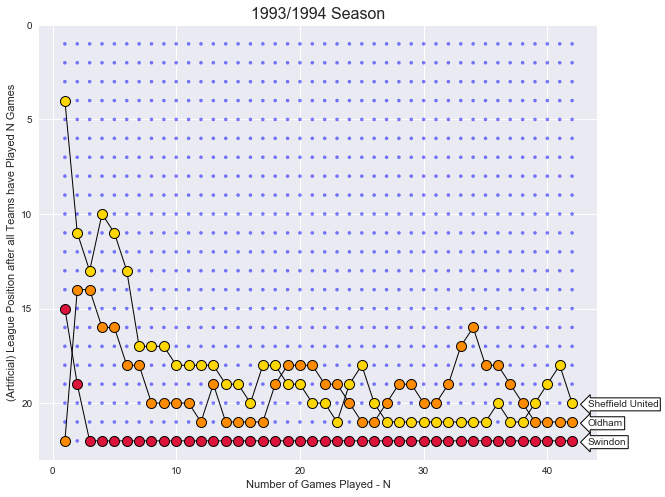

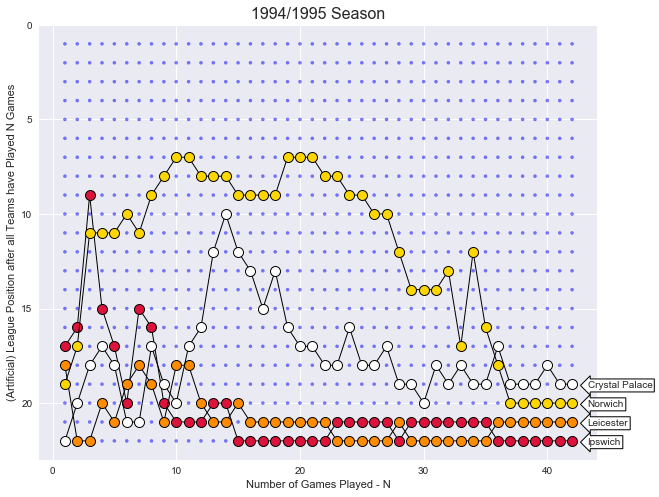

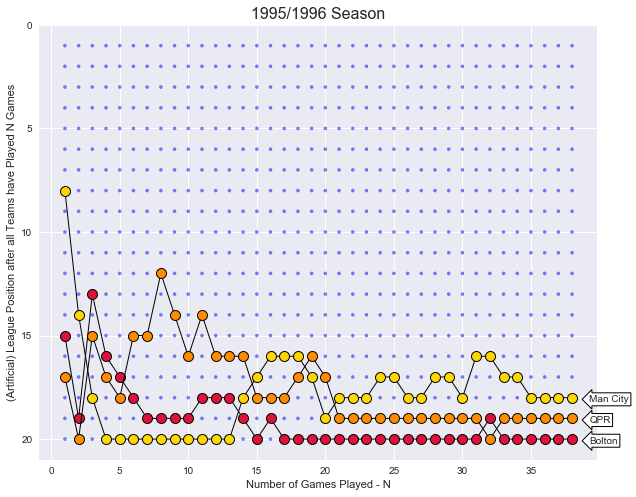

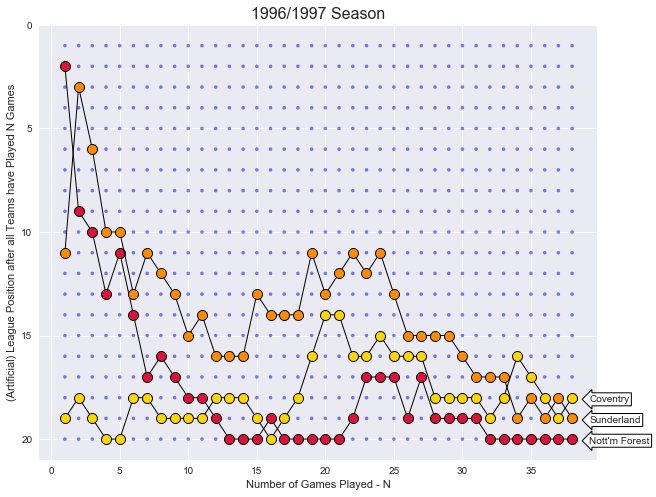

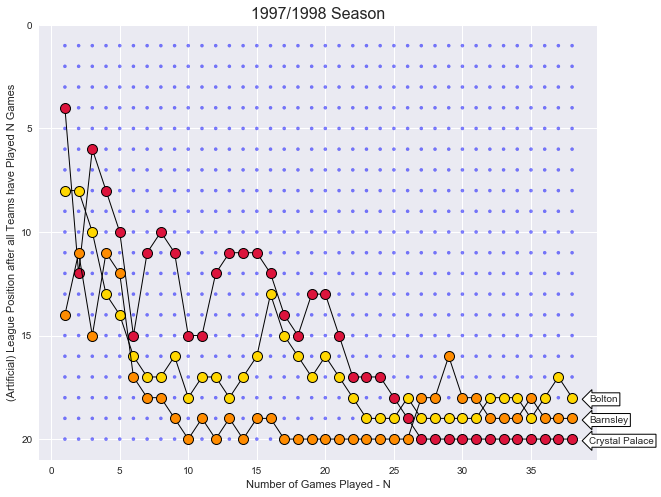

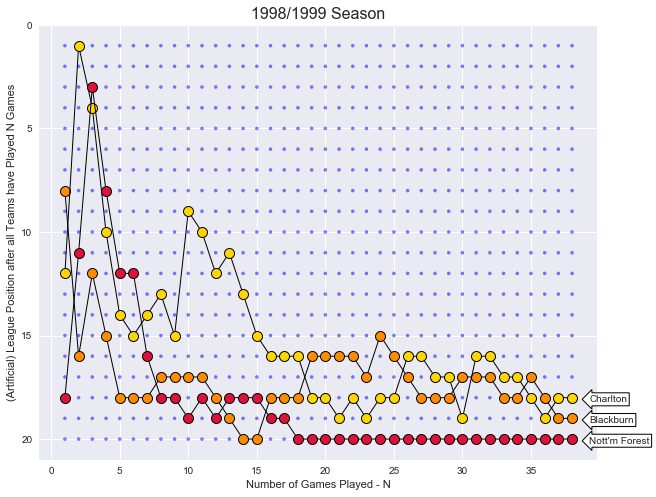

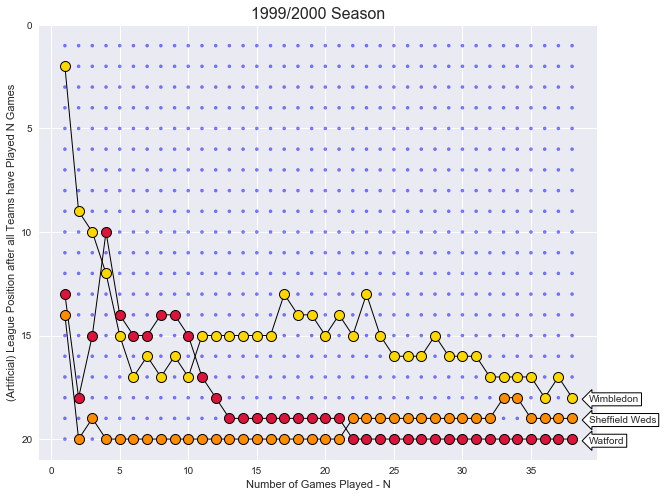

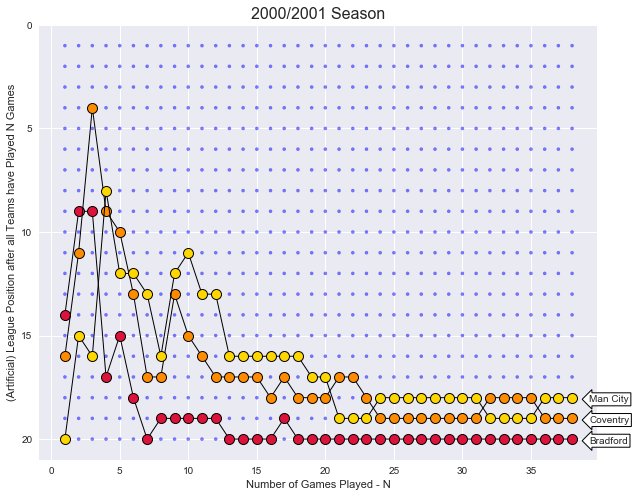

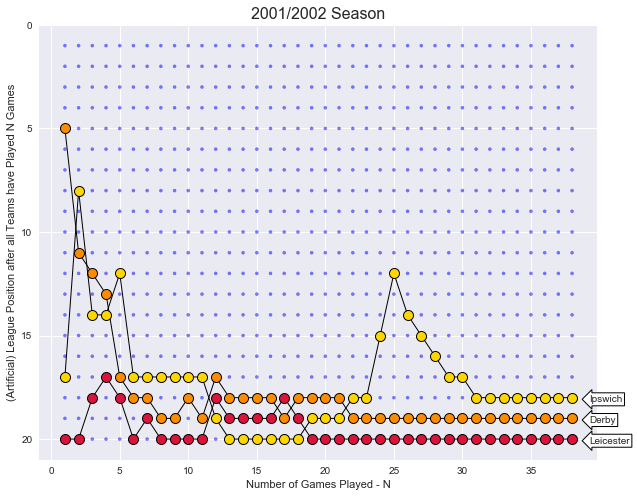

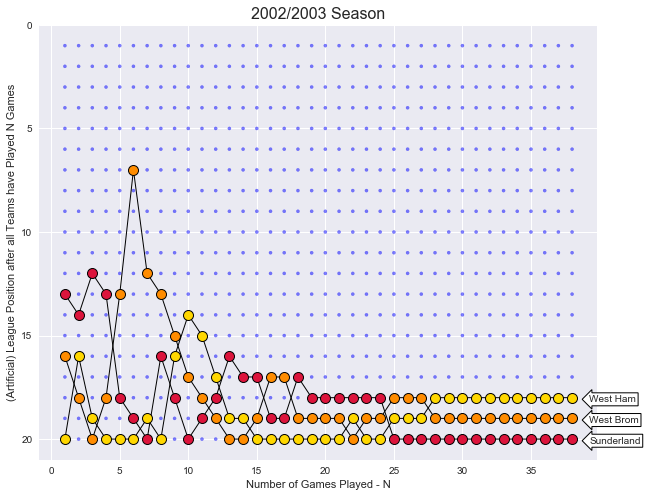

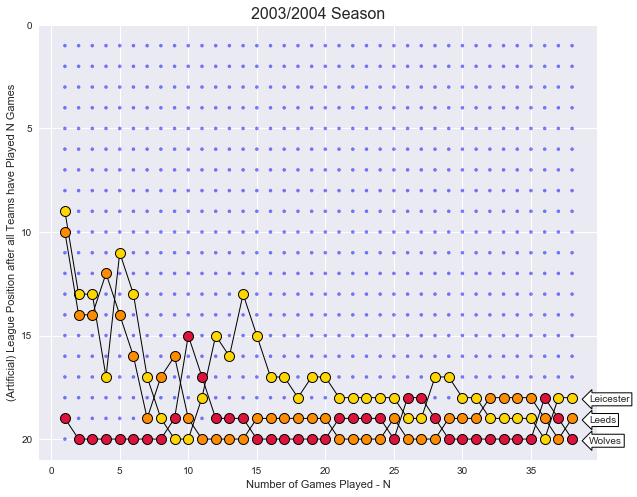

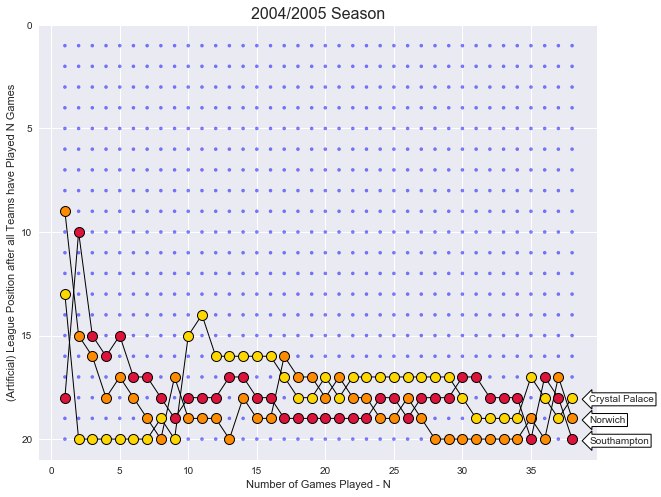

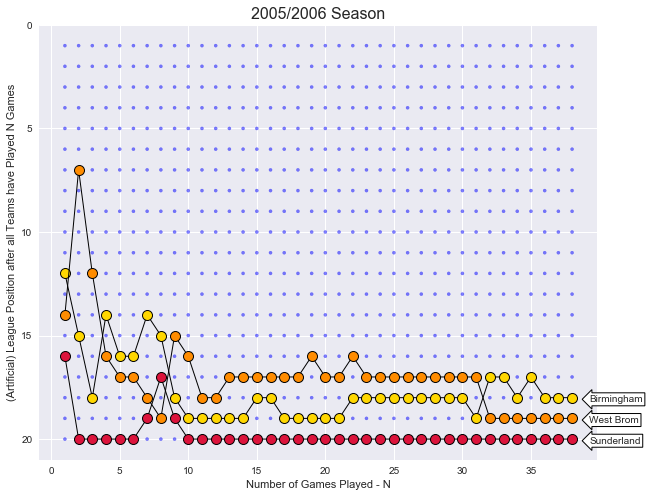

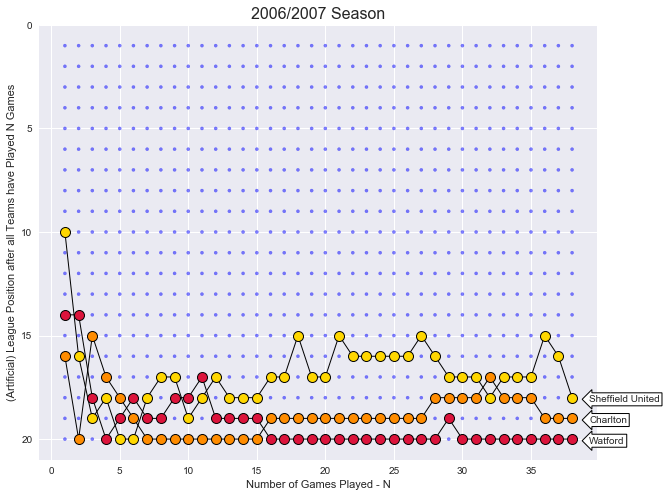

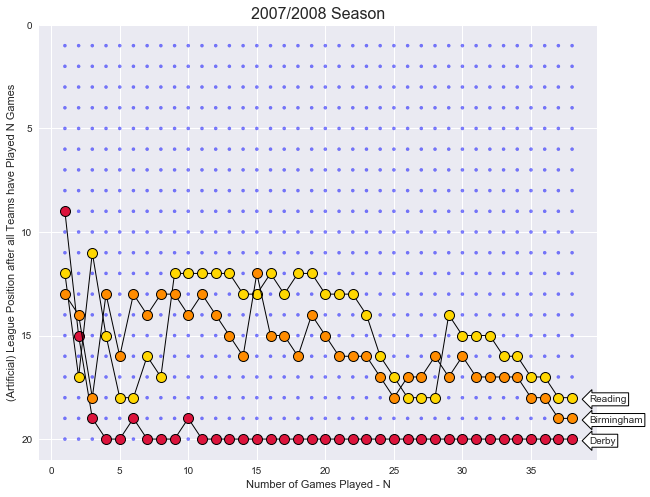

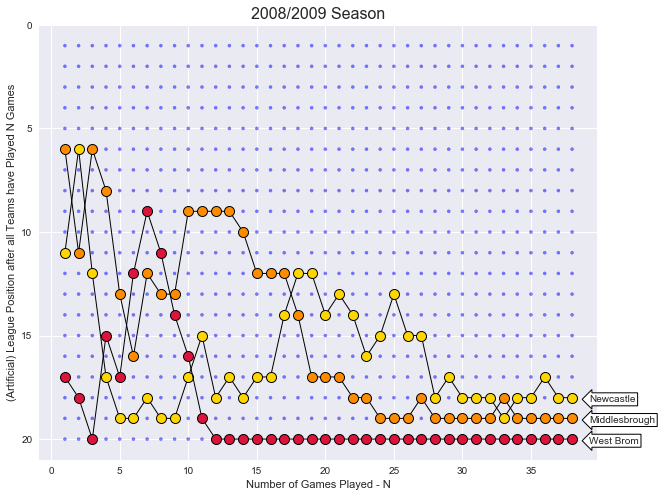

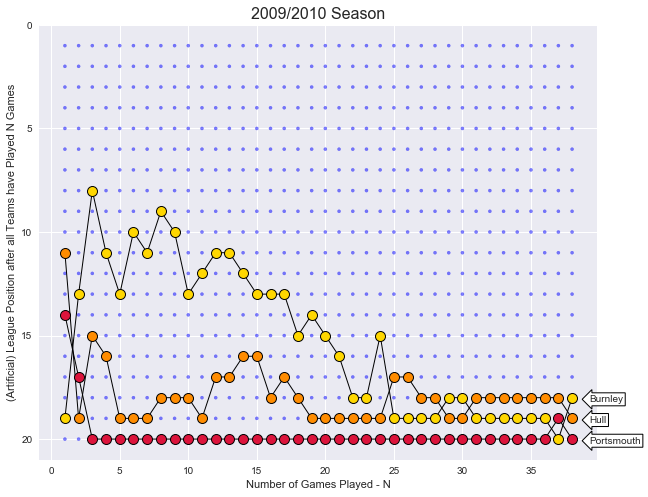

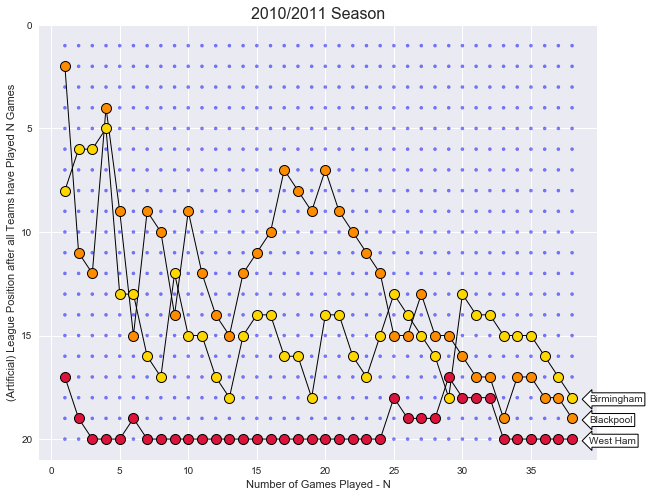

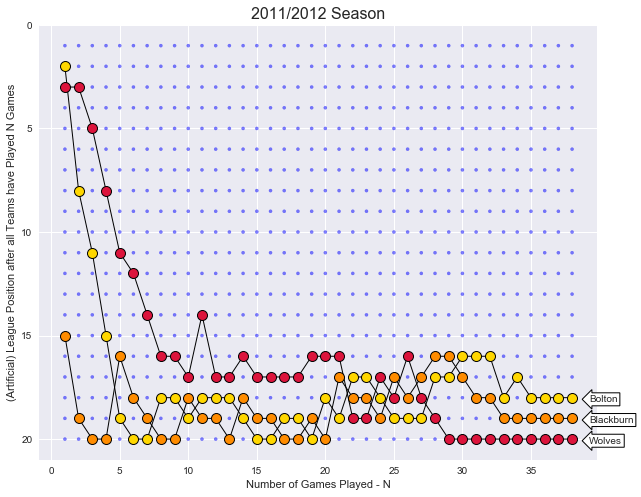

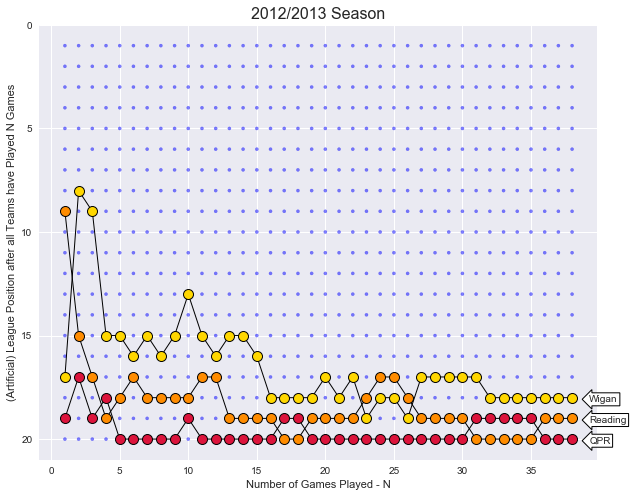

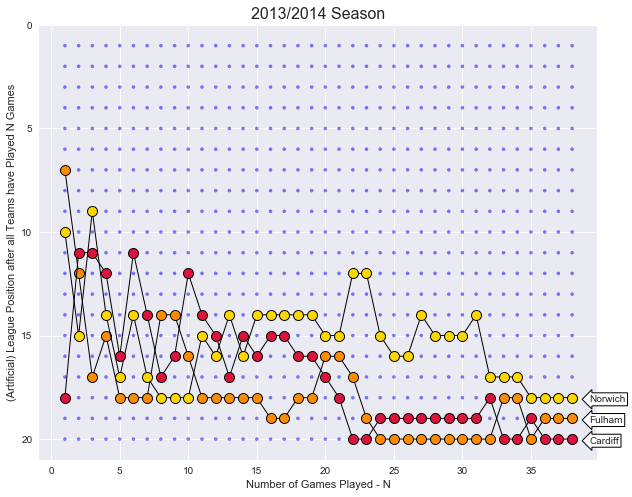

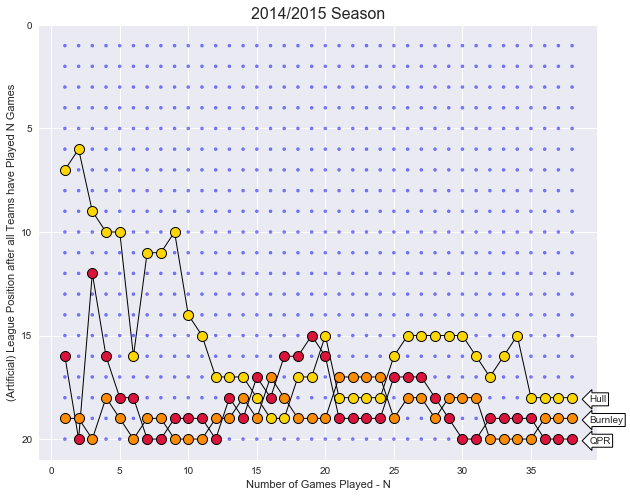

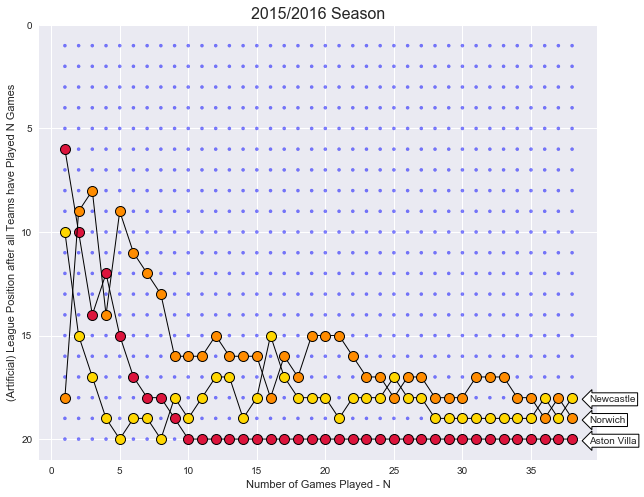

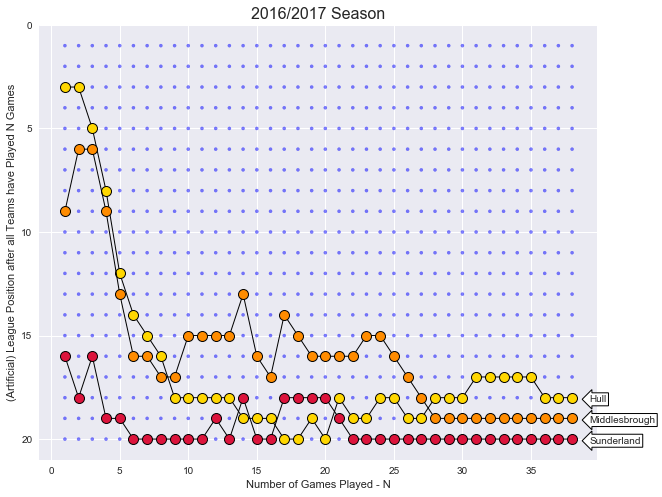

In [18]:
# plot some charts showing relegated teams by league position after n games throughout the season

for season_start_calyear in range(1993,2017):

    # initialise empty lists for the x,y and colour values
    x=[]
    y=[]
    c=[]
    
    # calculate number of matches in this season
    matches=38 if season_start_calyear>1994 else 42
    
    # get all results after n games from our features remembering n is the dictionary key
    for key in range(1,matches+1):
        df_tmp=feature_dict[str(key)]
        
        # select games from the season we're interested in only
        df_tmp=df_tmp[df_tmp['Season']==season_start_calyear]
        
        if key==1:
            relegated=df_tmp['Team'][df_tmp['Relegated']==1]
            relegated_positions=pd.DataFrame(index=relegated,columns=range(1,matches+1))
        
        # the x value is number of games played, the y value is the position after n games and c is red if relegated, blue otherwise
        # get a tuple of position, relegated indicator for all teams
        for j in zip(df_tmp['Position'],df_tmp['Relegated'],df_tmp['Team']):
            x.append(int(key))
            y.append(j[0])
            if j[1]==1:
                c.append('r')
                relegated_positions[key].loc[j[2]]=j[0]
            else:
                c.append('b')
        
                
    fig, ax = plt.subplots(figsize=(10,8))
    
    ax.scatter(x,y,c=c, s=10,alpha=0.5)
    
    for team in relegated:
        if relegated_positions.loc[team][matches]==matches/2+1:
            col='CRIMSON'
        elif relegated_positions.loc[team][matches]==matches/2:
            col='DARKORANGE'
        elif relegated_positions.loc[team][matches]==matches/2-1:
            col='GOLD'
        else:
            col='WHITE'
        ax.plot(relegated_positions.loc[team],c='k',lw=1,
                marker='.',markersize=20,markeredgecolor='k',markeredgewidth=1,mfc=col)
        
    
    f_tmp=feature_dict[str(matches)]
    df_tmp=df_tmp[df_tmp['Season']==season_start_calyear]
    
    for j in zip(df_tmp['Position'],df_tmp['Relegated'],df_tmp['Team']):
            if j[1]==1:
                plt.annotate(j[2],(matches+1.25,j[0]+.20),bbox=dict(boxstyle="larrow,pad=0.2", fc="white", ec="k", lw=1))
                
    ax.set_ylim([matches/2+2,0])
    title= str(season_start_calyear)+'/'+str(season_start_calyear+1)+' Season'
    plt.title(title, fontsize=16)
    plt.xlabel('Number of Games Played - N')
    plt.ylabel('(Artificial) League Position after all Teams have Played N Games')
    plt.yticks(np.arange(0, 21, 5.0))
    plt.show()
    

## Correlation of features and PCA analysis

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegressionCV

### Create the feature and target set and then split into training and test data

In [20]:
# This is the variable n - it was varied between 1 and 38 to assess how the models performed after n games
games_played='19'

feature_list=['Against', 'Drawn', 'For', 'GD', 'Lost', 'Points','Won']
target_list=['Relegated']

In [21]:
# start the training data from the 1995/96 season, the season in which the number of teams reduced to 20.
# we have 21 seasons of data so split use a 2:1 train:test split.
first_train_season=1995
first_test_season=2010

In [22]:
table=feature_dict[games_played]
table_train=table[[(x>=first_train_season and x<first_test_season) for x in table['Season']]]
table_test=table[table['Season']>=first_test_season]

In [23]:
print table.shape
print table_train.shape
print table_test.shape

(484, 13)
(300, 13)
(140, 13)


In [24]:
X_train=table_train[feature_list]
y_train=table_train[target_list]
X_test=table_test[feature_list]
y_test=table_test[target_list]

### Identify correlations in the training data

In [25]:
feature_corr=pd.concat([X_train,y_train], axis=1).corr()
feature_corr=feature_corr.applymap(lambda x: round(x,2))

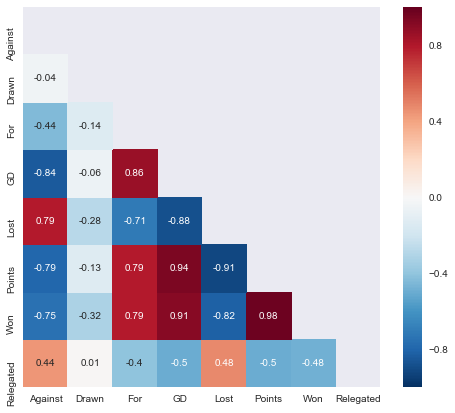

In [26]:
mask = np.zeros_like(feature_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(8,7))
ax = sns.heatmap(feature_corr, mask=mask, annot=True)

plt.show()

**COMMENTS:** There are unsurprisingly a large number of correlations. Goals for, goal difference, games won and points are strongly positively correlated to each other. Goals against and games lost are strongly positively correlated and both are negatively correlated to points. Games drawn has close to zero correlation with relegation meaning teams that stay up and are relegated have a similar number of drawn games. This suggests it is points from games won rather than games drawn that help a team stay up.

### Normalise the data and perform a principal component analysis

In [27]:
# Normalise the features
StdSclr=StandardScaler()
X_train_norm=StdSclr.fit_transform(X_train)
X_test_norm=StdSclr.transform(X_test)

In [28]:
# perform PCA
pca = PCA(n_components=7)
pca.fit(X_train_norm)


PCA(copy=True, iterated_power='auto', n_components=7, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [29]:
# list of principal axes in order of the eigenvalues
print pd.DataFrame(pca.components_.T,index=feature_list)


                0         1         2         3         4         5         6
Against -0.368987 -0.161341  0.678768 -0.428488 -0.186106  0.343052 -0.202904
Drawn   -0.034264  0.894829  0.191139 -0.004646 -0.071773 -0.229452 -0.322105
For      0.368934 -0.134056  0.702666  0.367615  0.197105 -0.363326  0.214896
GD       0.435265  0.011093  0.037484  0.468554 -0.324835  0.598773 -0.354156
Lost    -0.408479 -0.320534 -0.051320  0.391152 -0.367884 -0.473796 -0.463625
Points   0.436833 -0.046229 -0.027605 -0.402495 -0.727235 -0.287322  0.181248
Won      0.423590 -0.224224 -0.064808 -0.383002  0.389406 -0.179149 -0.660055


In [30]:
# Percentage of variance explained by each of the selected components.
exp_var = pca.explained_variance_ratio_
exp_var

array([  7.27265764e-01,   1.73860182e-01,   7.63552492e-02,
         2.25188051e-02,   5.31632717e-33,   4.45013035e-33,
         1.19949463e-33])

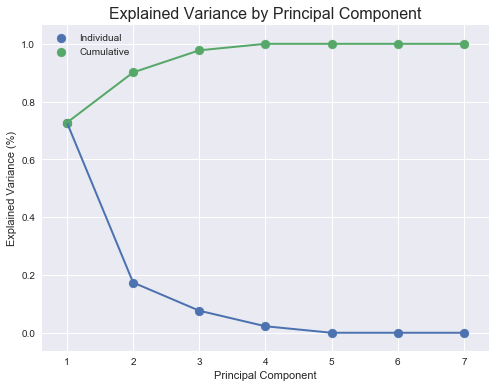

In [31]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(range(1, len(exp_var)+1), exp_var, lw=2)
indiv=ax.scatter(range(1, len(exp_var)+1), exp_var, s=80)
ax.plot(range(1, len(exp_var)+1), np.cumsum(exp_var), lw=2)
cum=ax.scatter(range(1, len(exp_var)+1), np.cumsum(exp_var), s=80)
ax.set_title('Explained Variance by Principal Component', fontsize=16)
ax.set_xlabel('Principal Component')
ax.set_ylabel('Explained Variance (%)')
plt.legend([indiv,cum],['Individual','Cumulative'])
plt.show()

** COMMENTS:** Most of the variance (72%) can be explained by one principal component. This is very approximately the sum of normalised positive features less normalised negative features when it comes to staying up, i.e. 0.4 * ( Games Won + Points + Goal Difference + Goals For - Games Lost - Goals Against).

### Perform Horn's Parallel Analysis

In [25]:
# Replace with the actual algorithm
def horn_parallel_analysis(shape, iters=1000, percentile=95):
    eigenvals=[]
    for n in range(0,iters):
        df=np.random.normal(size=shape)
        pca = PCA(n_components=shape[1])
        pca.fit(df)
        eigenvals.append(pca.explained_variance_)
    eigenvals=np.array(eigenvals)    
    return eigenvals, np.percentile(eigenvals,percentile,axis=0)

In [33]:
hpa_eigenvals, hpa_95 = horn_parallel_analysis(X_train_norm.shape)
print hpa_95

[ 1.35524638  1.23431025  1.14316284  1.06430825  0.98902923  0.91612217
  0.84080865]


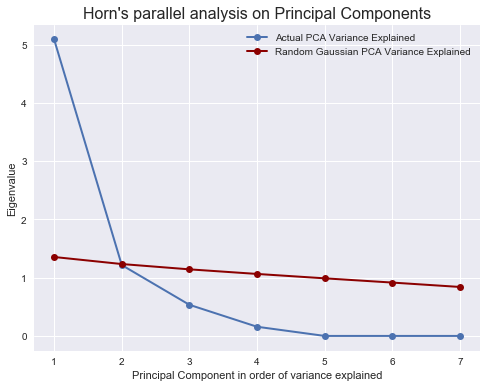

In [34]:
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(range(1, X_train_norm.shape[1]+1), pca.explained_variance_, lw=2, marker='o')
ax.plot(range(1, X_train_norm.shape[1]+1), hpa_95, lw=2, color='darkred', marker='o')

ax.set_title("Horn's parallel analysis on Principal Components",fontsize=16)
ax.set_xlabel("Principal Component in order of variance explained")
ax.set_ylabel("Eigenvalue")

plt.legend(['Actual PCA Variance Explained', "Random Gaussian PCA Variance Explained"])
plt.show()

**COMMENTS:** Horn's Parallel Analysis determines the number of times an eigenvalue (the measure of explained variance) would be observed in random (uncorrelated) data. The chart above shows that 95% of eigenvalues derived from random data are below the red line. This suggests that the seven features in my data set can be summarised into one main predictive feature with the remainder being just noise.

In [35]:
# transform the training and test data into it's principal components
X_train_pca=pca.transform(X_train_norm)
X_test_pca=pca.transform(X_test_norm)

In [36]:
X_train_pca=pd.DataFrame(X_train_pca,columns=['PC_'+str(x+1) for x in range(X_train_pca.shape[1])])
X_test_pca=pd.DataFrame(X_test_pca,columns=['PC_'+str(x+1) for x in range(X_test_pca.shape[1])])

In [37]:
X_train_pca.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7
0,4.668225,-1.124165,0.295581,-0.332491,-2.195600e-16,-2.203137e-16,-5.167998e-16
1,2.445935,-0.069712,0.755243,0.002355,-1.178876e-16,-1.776869e-16,-3.116168e-17
2,2.618610,-0.497648,-0.089385,0.586777,-1.733988e-16,-6.666457e-17,-2.532063e-16
3,1.791649,1.341375,-0.194320,-0.514762,-7.447256e-16,2.423646e-16,-6.313971e-16
4,1.798451,0.906963,-1.042718,-0.109362,-8.002367e-16,2.978757e-16,-9.089529e-16


**COMMENTS:** Interesting to note how small the components become after PC_4. This illustrates the power of PCA  in removing correlations from the data which might otherwise affect the modelling.

### Perform some basic modelling (the main analysis will come in Section Two)

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_pca, np.ravel(y_train))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [39]:
print 'Baseline:\t', 1. - np.mean(y_test)
print 'Model score:\t', knn.score(X_test_pca, y_test)



Baseline:	Relegated    0.85
dtype: float64
Model score:	0.878571428571


**COMMENTS:** As relegation is the minority class looking at accuracy as a measure of model performance does not make sense. Recall, see below, is a better measure. Comparisons against the baseline model, no teams relegated, are also meaningless. 

In [40]:
# predicted test class:
y_pred = knn.predict(X_test_pca)

In [41]:
conmat = np.array(confusion_matrix(y_test, y_pred, labels=[1,0]))

confusion = pd.DataFrame(conmat, index=['relegated', 'not_relegated'],
                         columns=['predicted_relegated','predicted_not_relegated'])
confusion

,predicted_relegated,predicted_not_relegated
relegated,10,11
not_relegated,6,113


In [42]:
print classification_report(y_test, y_pred)

             precision    recall  f1-score   support

          0       0.91      0.95      0.93       119
          1       0.62      0.48      0.54        21

avg / total       0.87      0.88      0.87       140



**COMMENTS:** this model predicted relegation for teams that were relegated 50% of the time (recall) and 60% of the teams it predicted for relegation were actually relegated (precision). It predicted relegation 16 times compared to the 21 times it occurred in the test data.

#### Check what happens if we use the first two principal components instead of the whole feature set

In [43]:
knn.fit(X_train_pca[['PC_1','PC_2']], np.ravel(y_train))
y_pred = knn.predict(X_test_pca[['PC_1','PC_2']])
print classification_report(y_test, y_pred)

             precision    recall  f1-score   support

          0       0.93      0.93      0.93       119
          1       0.60      0.57      0.59        21

avg / total       0.88      0.88      0.88       140



**COMMENTS:** there a slight increase in accuracy from 0.87 to 0.88 and a jump in recall for relegation from 0.48 to 0.57. It works well for this model!

In [44]:
lr = LogisticRegression()
lr.fit(X_train_pca, np.ravel(y_train))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [45]:
y_pred = lr.predict(X_test_pca)
print classification_report(y_test, y_pred)

             precision    recall  f1-score   support

          0       0.90      0.94      0.92       119
          1       0.56      0.43      0.49        21

avg / total       0.85      0.86      0.86       140



In [46]:
lr.fit(X_train_pca[['PC_1','PC_2']], np.ravel(y_train))
y_pred = lr.predict(X_test_pca[['PC_1','PC_2']])
print classification_report(y_test, y_pred)
# Not as big a change as for KNN

             precision    recall  f1-score   support

          0       0.91      0.95      0.93       119
          1       0.62      0.48      0.54        21

avg / total       0.87      0.88      0.87       140



In [47]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train_pca, np.ravel(y_train))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [48]:
y_pred = dtc.predict(X_test_pca)
print classification_report(y_test, y_pred)

             precision    recall  f1-score   support

          0       0.89      0.87      0.88       119
          1       0.35      0.38      0.36        21

avg / total       0.81      0.80      0.80       140



In [49]:
rfc = RandomForestClassifier()
rfc.fit(X_train_pca, np.ravel(y_train))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [50]:
y_pred = rfc.predict(X_test_pca)
print classification_report(y_test, y_pred)

             precision    recall  f1-score   support

          0       0.91      0.96      0.93       119
          1       0.67      0.48      0.56        21

avg / total       0.88      0.89      0.88       140



# SECTION TWO

## Feature list for Pass Two

The model is in fact 38 different models, each one trained on league table information after a different number of games played. Let's call this, n. n runs from 1 to 38 (as seasons 1995/96 onwards only are being used for training and testing)

### Pass One Features 

After n games:  

* Number of games won, drawn and lost
* Goals for, against and goal difference
* Number of points

LOGIC: This is the basic information underlying the league table and is readily available.

### Additional Pass Two Features

* Number of points won in the n-th game, the (n-1)th game .... (n-4)th game  
* Position in the table  
* For the four teams in the two positions above and two positions below, the difference in games played and points
* Historic finishing positions in the previous three seasons
* Promoted team flag

### Reasoning

#### Number of points won in the n-th game, the (n-1)th game .... (n-4)th game   
This represents current form over the last five games and is becoming more widely published in league tables. Including this should add more predictive power to the final points score and therefore league position
#### Position in the table   
This should be a clear indication to relegation. However, as position is relative to other teams in the league who may have played fewer or more games we need additional information to give it context:  
#### For the four teams in the two positions above and two positions below, the difference in games played and points  
If the teams is in first position, the teams in the two positions above are assumed to be copies of the first placed team. Similarly the teams below last position are assumed to be copies of the last placed team. This means the first placed team has zero delta to the "teams above it" and similary for the last placed team.  

These features should hopefully identify situations in which the battle for relegation is tight and there is little difference in points between teams fighting it out and also when there is a large gap to safety.
#### Historic finishing positions in the previous three seasons  
Ranks run from 1-20 in the Premier League, 21 to 44 in the Championship etc. Past position should be a guide to future position
####  Promoted team flag  
Whether a team is a promoted team from the Championship the previous season. There is overlap with the finishing position in the previous season but as that is being treated as a continuous variable I have added a separate binary categorical variable to improve predictive power

## Data Issues  

Middlesbrough sometimes appears as Middlesboro in the game results file. 
ACTION: change all occurrences of "Middlesboro" to "Middleborough" on first use from the game results dataframe.[Could also have done a search replace on the dataframe of the loaded results file]



In [ ]:
def init_table_pass2(df):
    ''' Initialise the league table
        Input is the dataframe containing the matches for a particular season (in the required format)
        Output 1 is a dataframe full of zeroes in the format of a league table plus the target
        Output 2 is a list of teams for the season'''
    
    team_names=pd.Series(df['HomeTeam'].unique())
    team_names=team_names.dropna()
    team_names=['Middlesbrough' if x=='Middlesboro' else x for x in team_names]
    
    # Notation
    # Pts_0 = points from most recent game, the n-th game. Pts_1 = points from the previous game etc
    # GamesDelta root = difference in games, PtsDelta root = difference in points
    # Pos1A suffix = team one position above, Pos1B = team one position below
        # All differences are team minus comparison team - so, points above will be negative, points below will be positive
    # Position_SeaM1 = position in season minus 1, etc 
    # Promoted_SeaM1 = 1 if promoted into the EPL from the Championship last season
    
    
    tab=pd.DataFrame(0.,columns=['Played','Won','Drawn','Lost','For','Against','GD','Points',
            'Pts_0','Pts_1','Pts_2','Pts_3','Pts_4',
            'Position','GamesDelta_Pos1A','GamesDelta_Pos2A','GamesDelta_Pos1B','GamesDelta_Pos2B',
            'PtsDelta_Pos1A','PtsDelta_Pos2A','PtsDelta_Pos1B','PtsDelta_Pos2B',                   
            'Team','Season','Position_SeaM1','Position_SeaM2','Position_SeaM3','Promoted_SeaM1',
            'Relegated'],index=team_names)
    
    return tab, team_names

### Create dictionary of historic league positions

In [ ]:
# historic_positions is a dictionary of dictionaries
# The first key is the season we are interested. This returns a dictionary as the value.
# The key in this dictionary is the name of the team and the value the league position assuming continuous league
# positions down the leagues.

# This means it is easy to look up where a particular team finished in a particular season


historic_positions={}

for season_start_calyear in range(1993,2017):
    
    season=str(season_start_calyear)[-2:]+str(season_start_calyear+1)[-2:]
    print season, '\t',
    
    # Load match results for top tier in season
    filename='E0_'+season+'.csv'
    df=pd.read_csv(filename,usecols=range(10),parse_dates=[1],dayfirst=True)
    
    # Get final league table
    tab=table_date(df,datetime.datetime(season_start_calyear+1,6,30))
    tab_sorted= tab.sort_values(by=['Points','GD','For'],ascending=False)
    teams=tab_sorted.index.values
    
    historic_positions[season_start_calyear]={team: position for position, team in enumerate(teams,1)}
    EX_start=tab.shape[0]
    
    # Load match results for second tier in season
    filename='E1_'+season+'.csv'
    df=pd.read_csv(filename,usecols=range(10),parse_dates=[1],dayfirst=True)
    
    # Get final league table
    tab=table_date(df,datetime.datetime(season_start_calyear+1,6,30))
    tab_sorted= tab.sort_values(by=['Points','GD','For'],ascending=False)
    teams=tab_sorted.index.values
    
    historic_positions[season_start_calyear].update({team: position for position, team in enumerate(teams,1+EX_start)})
    EX_start+=tab.shape[0]
    
    # Load match results for third tier in season
    filename='E2_'+season+'.csv'
    df=pd.read_csv(filename,usecols=range(10),parse_dates=[1],dayfirst=True)
    
    # Get final league table
    tab=table_date(df,datetime.datetime(season_start_calyear+1,6,30))
    tab_sorted= tab.sort_values(by=['Points','GD','For'],ascending=False)
    teams=tab_sorted.index.values
    
    historic_positions[season_start_calyear].update({team: position for position, team in enumerate(teams,1+EX_start)})

    
print '\n',"Saving ..."

with open('league_positions.json', 'w') as outputfile:
    json.dump(historic_positions, outputfile)

### Create a new feature set based on the Section Two requirements

Update the table at the end of every day. If a team has played a game, its position changes as a result of other teams' games or its games in hand features change - output the features of that team to the dataset.  

This is asymmetric compared to the Section One dataset. The first one had exactly 38 teams who have played n games. The Section Two dataset will have more depending on the number of days the nth games are played over and the impact this has on a table. Teams for which no features changed are not recorded for a second time. This causes the asymmetry. Will this cause problems with the training set? I need to think more about this.

In [ ]:
# Create dictionary of features, target and other useful information - this takes about five minutes
# key is number of games played, value is a dataframe for features after n games played
# Initialise the dictionary
# Key is number of games played
# Value is an empty dataframe with specified columns to which we can append rows of features

feature_dict={}
for j in range(43):
    feature_dict[j]=pd.DataFrame(columns=['Played','Won','Drawn','Lost','For','Against','GD','Points',
            'Pts_0','Pts_1','Pts_2','Pts_3','Pts_4',
            'Position','GamesDelta_Pos1A','GamesDelta_Pos2A','GamesDelta_Pos1B','GamesDelta_Pos2B',
            'PtsDelta_Pos1A','PtsDelta_Pos2A','PtsDelta_Pos1B','PtsDelta_Pos2B',                   
            'Team','Season','Position_SeaM1','Position_SeaM2','Position_SeaM3','Promoted_SeaM1',
            'Relegated','TableDate'])

for season_start_calyear in range(1993,2017):
    
    # Load match results for season
    season=str(season_start_calyear)[-2:]+str(season_start_calyear+1)[-2:]
    filename='E0_'+season+'.csv'
    print '\n',filename,
    # read in the first 10 columns only - some seasons have extra commas at the end of rows which means more 
    # data items then column headings
    # get pandas to convert date string to dates. It's better than using split on '/' as some years are Y not y as expected
    df=pd.read_csv(filename,usecols=range(10),parse_dates=[1],dayfirst=True)
    
    # Get final league table and relegated teams
    tab=table_date(df,datetime.datetime(season_start_calyear+1,6,30))
    tab_sorted= tab.sort_values(by=['Points','GD','For'],ascending=False)
    relegated= tab_sorted.index[-4 if season_start_calyear==1994 else -3:]
    
    # Set up some simple variables
    num_teams=len(tab.index.values)
    tot_matches=2*(num_teams-1)
    
    # Initialise a blank league table
    tab, team_names = init_table_pass2(df)
    
    # add independent information and the target - not used as features
    tab.loc[relegated,'Relegated']=1
    tab['Team']=tab.index.values
    tab['Season']=[season_start_calyear for x in range(num_teams)]
    
    # add historic league positions where available
    if season_start_calyear>1993:
        for team in team_names:
            tab.loc[team,'Position_SeaM1']=historic_positions[str(season_start_calyear-1)][team]
            
    if season_start_calyear>1994:
        for team in team_names:
            tab.loc[team,'Position_SeaM2']=historic_positions[str(season_start_calyear-2)][team]
            
    if season_start_calyear>1995:
        for team in team_names:
            tab.loc[team,'Position_SeaM3']=historic_positions[str(season_start_calyear-3)][team]
    
    # add a flag for promoted teams
    if season_start_calyear>1993:
        for team in team_names:
            if tab.loc[team,'Position_SeaM1']>(22 if (season_start_calyear-1)<1995 else 20)
                tab.loc[team,'Promoted_SeaM1']=1.0
                       
    # loop through each day and process games on that day
    # spit out features if they have changed from the previous day, this includes games in hand and points differences
    
    # number of rows in the results dataframe
    rows_in_game_data=df.shape[0]
    
    # previous date and table so we can spot differences
    prev_date=df['Date'][0]
    prev_tab=tab.copy()
    
    # i is the row in the results dataframe
    i=0
    
    while i<rows_in_game_data:
        
        # get the date from the row we're in and check that we haven't reaced the empty rows
        current_date=df['Date'][i]
        if type(current_date)!=pd._libs.tslib.Timestamp:
            break
        
        # as long as the date hasn't changed extract game results and update the table
        while current_date==prev_date:
            
            # Extract goals and teams
            # NOTE FTHG AND FTAG MAY ALSO BE STORED AS HG AND AG
            FTHG=float(df['FTHG'][i])
            FTAG=float(df['FTAG'][i])
            HT=df['HomeTeam'][i]
            AT=df['AwayTeam'][i]
            
            if HT=='Middlesboro':
                HT='Middlesbrough'
            if AT=='Middlesboro':
                AT='Middlesbrough'
            
            # Update league table for result and goals ...
            tab.loc[HT,'Played']+=1.
            tab.loc[AT,'Played']+=1.
            tab.loc[HT,'For']+=FTHG
            tab.loc[HT,'Against']+=FTAG
            tab.loc[HT,'GD']+=FTHG-FTAG
            tab.loc[AT,'For']+=FTAG
            tab.loc[AT,'Against']+=FTHG
            tab.loc[AT,'GD']+=FTAG-FTHG
                
            # update current form - shift previous games one along
            for j in range(4,0,-1):
                tab.loc[HT,'Pts_'+str(j)]=tab.loc[HT,'Pts_'+str(j-1)]
                tab.loc[AT,'Pts_'+str(j)]=tab.loc[AT,'Pts_'+str(j-1)]
                
            if FTHG>FTAG:
            
                tab.loc[HT,'Won']+=1.
                tab.loc[AT,'Lost']+=1.
                tab.loc[HT,'Points']+=3.
                tab.loc[HT,'Pts_0']=3.
                tab.loc[AT,'Pts_0']=0.
            
            elif FTHG<FTAG:
            
                tab.loc[AT,'Won']+=1.
                tab.loc[HT,'Lost']+=1.
                tab.loc[AT,'Points']+=3.
                tab.loc[HT,'Pts_0']=0.
                tab.loc[AT,'Pts_0']=3.
            else:
            
                tab.loc[AT,'Drawn']+=1.
                tab.loc[HT,'Drawn']+=1.
                tab.loc[HT,'Points']+=1.
                tab.loc[AT,'Points']+=1.
                tab.loc[HT,'Pts_0']=1.
                tab.loc[AT,'Pts_0']=1.
             
            if i%50==0:
                print i,
            
            # add one to the row index, get the new date and check we haven't reached the end of the file or got a NaN value
            i+=1
            if i==rows_in_game_data:
                break
            current_date=df['Date'][i]
            if type(current_date)!=pd._libs.tslib.Timestamp:
                break
    
        # Order the league table and output positions
        tab.sort_values(by=['Points','GD','For'],ascending=False,inplace=True)
        tab['Position']=[x+1 for x in range(num_teams)]
             
        # update the points and games played delta allowing for the table to continue outside first and last place
        temp=tab['Points'].diff(1)
        temp[0]=0.
        tab['PtsDelta_Pos1A']=temp
        temp=tab['Points'].diff(2)
        temp[0]=0.
        temp[1]=tab['PtsDelta_Pos1A'][1]
        tab['PtsDelta_Pos2A']=temp
        temp=tab['Points'].diff(-1)
        temp[-1]=0.
        tab['PtsDelta_Pos1B']=temp
        temp=tab['Points'].diff(-2)
        temp[-1]=0.
        temp[-2]=tab['PtsDelta_Pos1B'][-2]
        tab['PtsDelta_Pos2B']=temp
        temp=tab['Played'].diff(1)
        temp[0]=0.
        tab['GamesDelta_Pos1A']=temp
        temp=tab['Played'].diff(2)
        temp[0]=0.
        temp[1]=tab['GamesDelta_Pos1A'][1]
        tab['GamesDelta_Pos2A']=temp
        temp=tab['Played'].diff(-1)
        temp[-1]=0.
        tab['GamesDelta_Pos1B']=temp
        temp=tab['Played'].diff(-2)
        temp[-1]=0.
        temp[-2]=tab['GamesDelta_Pos1B'][-2]
        tab['GamesDelta_Pos2B']=temp
                
        # Has anything changed for a team? Do we need to update any features
        
        for team in team_names:
            # Has the number of games played increased since the previous game day
            if tab.loc[team,'Played']>prev_tab.loc[team,'Played']:
                spit_out=True
            # Had the position changed as result of other teams' games
            elif tab.loc[team,'Position']<>prev_tab.loc[team,'Position']:
                spit_out=True
            
            # Has the games in hand changed (if none have been played)?
            elif tab.loc[team,'GamesDelta_Pos1A']<>prev_tab.loc[team,'GamesDelta_Pos1A']:
                spit_out=True
            elif tab.loc[team,'GamesDelta_Pos2A']<>prev_tab.loc[team,'GamesDelta_Pos2A']:
                spit_out=True 
            elif tab.loc[team,'GamesDelta_Pos1B']<>prev_tab.loc[team,'GamesDelta_Pos1B']:
                spit_out=True
            elif tab.loc[team,'GamesDelta_Pos2B']<>prev_tab.loc[team,'GamesDelta_Pos2B']:
                spit_out=True
            
            else:
                spit_out=False
            
            if spit_out:
                spit_key=tab.loc[team,'Played']
                spit_row=tab.loc[team,:]
                spit_row=spit_row.append(pd.Series([prev_date.strftime("%d/%m/%y")],index=['TableDate']))
                feature_dict[spit_key]=feature_dict[spit_key].append(spit_row,ignore_index=True)
        
        # Set the previous table and date to the last current ones now that we have done the processing
        prev_date=current_date    
        prev_tab=tab.copy()
        
   

### Save dataset

In [ ]:
with open('features_pass2.json', 'w') as outputfile:
    json.dump(feature_dict, outputfile,cls=DataFrameEncoder)

### Load dataset

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc



In [32]:
with open('league_positions.json','r') as inputfile:
    historic_positions = json.load(inputfile)

In [33]:
# Load the json file. This gives us a dictionary of json versions of the n-game league tables
filename = 'features_pass2.json'
with open(filename,'r') as inputfile:
    feature_dict = json.load(inputfile)
    
# convert json output back to a dataframe
for key in feature_dict.keys():
    feature_dict[key]=pd.read_json(feature_dict[key], orient='records')

<a id='games_played_2'></a>
### Create the feature and target set and then split into training and test data¶

In [14]:
games_played='4'

In [15]:
feature_list=['Against', 'Drawn', 'For', 'GD', 'Lost', 'Points','Won', 
             'Pts_0','Pts_1','Pts_2','Pts_3','Pts_4',
            'Position','GamesDelta_Pos1A','GamesDelta_Pos2A','GamesDelta_Pos1B','GamesDelta_Pos2B',
            'PtsDelta_Pos1A','PtsDelta_Pos2A','PtsDelta_Pos1B','PtsDelta_Pos2B',                   
            'Position_SeaM1','Position_SeaM2','Position_SeaM3','Promoted_SeaM1']
           
target_list=['Relegated']

In [16]:
first_train_season=1995
first_test_season=2010

In [17]:
table=feature_dict[games_played]
table_train=table[[(x>=first_train_season and x<first_test_season) for x in table['Season']]]
table_test=table[table['Season']>=first_test_season]

## Perform a similar analysis to that set out in Section One ...

### Perfrom upsampling (if desired)

Create the same number of relegated teams as non-relegated by sampling from relegated teams with replacement to remove the class imbalance and help the training model learn relegated features.

In [34]:
upsample=False
if upsample:

    from sklearn.utils import resample
    table_train_r=table_train[table_train['Relegated']==1]
    table_train_s=table_train[table_train['Relegated']==0]
    
    table_train_r_upsample = resample(table_train_r, replace=True, n_samples=table_train_s.shape[0])
    table_train=pd.concat([table_train_r_upsample,table_train_s],axis=0)
    

In [35]:
X_train=table_train[feature_list]
y_train=table_train[target_list]
X_test=table_test[feature_list]
y_test=table_test[target_list]

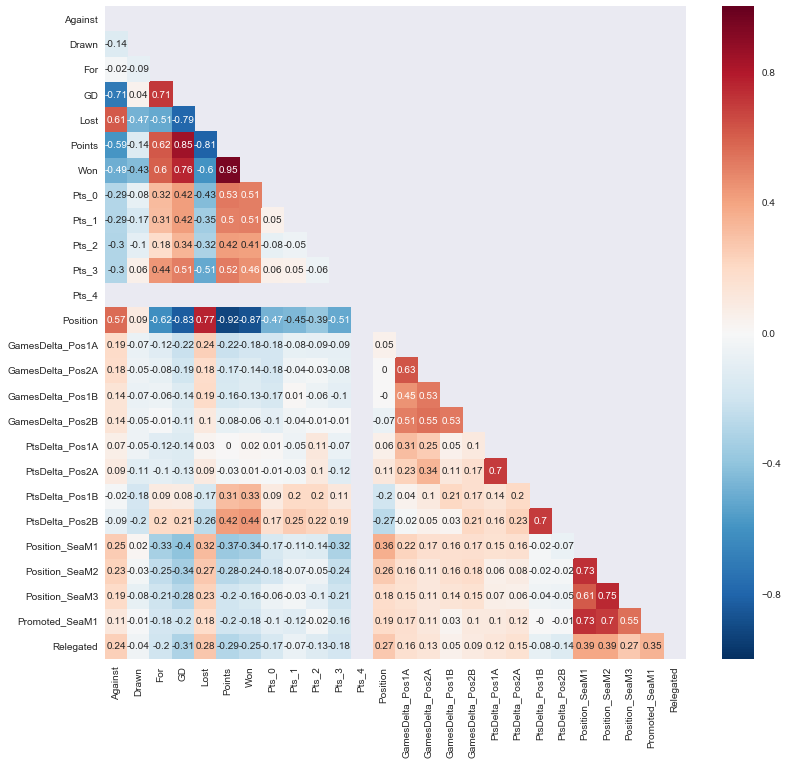

In [36]:
feature_corr=pd.concat([X_train,y_train],axis=1).corr()
feature_corr=feature_corr.applymap(lambda x: round(x,2))
mask = np.zeros_like(feature_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(13,12))
ax = sns.heatmap(feature_corr, mask=mask, annot=True)

plt.show()

**COMMENTS:** Negative correlation between points won in last five games and relegation. The higher the position (lower in the table) the greater chance of relegation. This applies to finishing position in the last three seasons too.

In [37]:
StdSclr=StandardScaler()
X_train_norm=StdSclr.fit_transform(X_train)
X_test_norm=StdSclr.transform(X_test)

In [38]:
pca = PCA()
pca.fit(X_train_norm)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

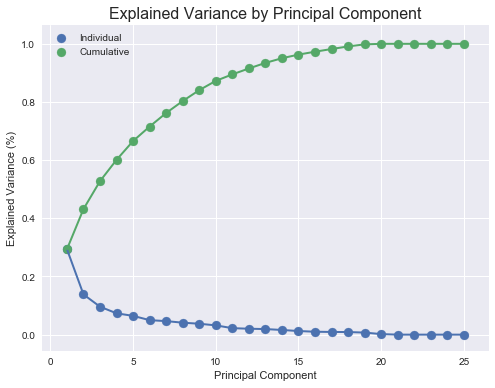

In [39]:
exp_var = pca.explained_variance_ratio_
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(range(1, len(exp_var)+1), exp_var, lw=2)
indiv=ax.scatter(range(1, len(exp_var)+1), exp_var, s=80)
ax.plot(range(1, len(exp_var)+1), np.cumsum(exp_var), lw=2)
cum=ax.scatter(range(1, len(exp_var)+1), np.cumsum(exp_var), s=80)
ax.set_title('Explained Variance by Principal Component', fontsize=16)
ax.set_xlabel('Principal Component')
ax.set_ylabel('Explained Variance (%)')
plt.legend([indiv,cum],['Individual','Cumulative'])
plt.show()

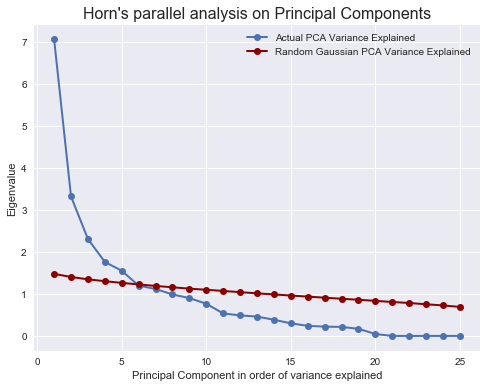

In [40]:
hpa_eigenvals, hpa_95 = horn_parallel_analysis(X_train_norm.shape)
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(range(1, X_train_norm.shape[1]+1), pca.explained_variance_, lw=2, marker='o')
ax.plot(range(1, X_train_norm.shape[1]+1), hpa_95, lw=2, color='darkred', marker='o')

ax.set_title("Horn's parallel analysis on Principal Components",fontsize=16)
ax.set_xlabel("Principal Component in order of variance explained")
ax.set_ylabel("Eigenvalue")

plt.legend(['Actual PCA Variance Explained', "Random Gaussian PCA Variance Explained"])
plt.show()

In [41]:
X_train_pca=pca.transform(X_train_norm)
X_test_pca=pca.transform(X_test_norm)
X_train_pca=pd.DataFrame(X_train_pca,columns=['PC_'+str(x+1) for x in range(X_train_pca.shape[1])])
X_test_pca=pd.DataFrame(X_test_pca,columns=['PC_'+str(x+1) for x in range(X_test_pca.shape[1])])

### Create functions to produce the confusion matrix and classification report 
This is done in two stages:  
1. A function outputs a tuple of metrics - this can be stored in a dataframe
2. Another function takes the tuple and displays the confusion matrix and classification report
  
The first function can therefore be used to store the metrics and also to feed the display function.

In [42]:
def scores_conmat(y_test,y_pred):
    """Replicates the output from sklearn's confusion matrix and classification report
    """
    
    TP=0 ; FP=0 ; TN=0 ; FN=0
    for test,pred in zip(np.ravel(y_test),np.ravel(y_pred)):
        if test==1:
            if pred==1:
                TP+=1
            else:
                FN+=1
        else:
            if pred==1:
                FP+=1
            else:
                TN+=1
    baseline= float(np.sum(y_test))/len(y_test)
    if baseline<0.5:
        baseline=1-baseline
    
    accuracy=float(TP+TN)/(TP+TN+FP+FN)
    
    if (TN+FN)==0:
        precision_0=0
    else:
        precision_0=float(TN)/(TN+FN)
    
    if (TP+FP)==0:
        precision_1=0
    else:
        precision_1=float(TP)/(TP+FP)
    
    if (TN+FP)==0:
        recall_0=0
    else:
        recall_0=float(TN)/(TN+FP)
    
    if (TP+FN)==0:
        recall_1=0
    else:
        recall_1=float(TP)/(TP+FN)
    
    if (recall_0+precision_0)==0:
        f1_score_0=0
    else:
        f1_score_0=2*recall_0*precision_0/(recall_0+precision_0)
    
    if (recall_1+precision_1)==0:
        f1_score_1=0
    else:
        f1_score_1=2*recall_1*precision_1/(recall_1+precision_1)
    
    return TN, FN, FP, TP, baseline, accuracy, precision_0, precision_1, recall_0, recall_1, f1_score_0, f1_score_1


In [43]:
def print_scores_conmat(model_name,y_test,y_pred):
    """Display the confusion matrix and classification report based on output of the previous function"""
    TN, FN, FP, TP, baseline ,accuracy, precision_0, precision_1, recall_0, recall_1, f1_score_0, f1_score_1 \
        = scores_conmat(y_test,y_pred)
    confusion=np.array([[TN,FP,TN+FP],[FN,TP,FN+TP],[TN+FN,FP+TP,TN+FN+FP+TP]])
    print 'Model: '+model_name.upper()+'\n'
    # Pad the column names with spaces to make columns a similar size
    print pd.DataFrame(confusion,columns=['     Predicted Safe','Predicted Relegated','     Support'],
                       index=['Actual Safe','Actual Relegated','Total Predicted'])
    print '\nBaseline accuracy = %0.3f' %baseline
    print 'Accuracy = %0.3f' %accuracy
    print '\n\t\tPrecision\tRecall\t\tF1-Score'
    print 'Safe\t\t%0.3f\t\t%0.3f\t\t%0.3f' %(precision_0, recall_0, f1_score_0)
    print 'Relegated\t%0.3f\t\t%0.3f\t\t%0.3f' %(precision_1, recall_1, f1_score_1)
    
    wgt=float(TN+FP)/(TN+FP+FN+TP)
    precision_avg=precision_0*wgt+precision_1*(1-wgt)
    recall_avg=recall_0*wgt+recall_1*(1-wgt)
    f1_score_avg=f1_score_0*wgt+f1_score_1*(1-wgt)
    print 'Average\t\t%0.3f\t\t%0.3f\t\t%0.3f' %(precision_avg, recall_avg, f1_score_avg)
    return

In [44]:
def roc_curve_raja(y_test,y_prob_1):
    # For class 1, find the area under the curve
    fpr, tpr, _ = roc_curve(np.ravel(y_test), np.ravel(y_prob_1))
    roc_auc = auc(fpr, tpr)

    # Plot of a ROC curve for class 1 (will be relegated)
    plt.figure(figsize=[6,6])
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=4)
    plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
    plt.xlim([-0.05, 1.0])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic for relegation',fontsize=16)
    plt.legend(loc="lower right")
    plt.show()
    return

### Fit models and assess performance on the test data (based on teams having played n-games)
'n' can be varied [here](#games_played_2). We look at all games in the next part.

### K-Nearest Neighbours

Model: K-NEAREST NEIGHBOURS (K=5)

                       Predicted Safe  Predicted Relegated       Support
Actual Safe                       189                   14           203
Actual Relegated                   17                   17            34
Total Predicted                   206                   31           237

Baseline accuracy = 0.857
Accuracy = 0.869

		Precision	Recall		F1-Score
Safe		0.917		0.931		0.924
Relegated	0.548		0.500		0.523
Average		0.865		0.869		0.867




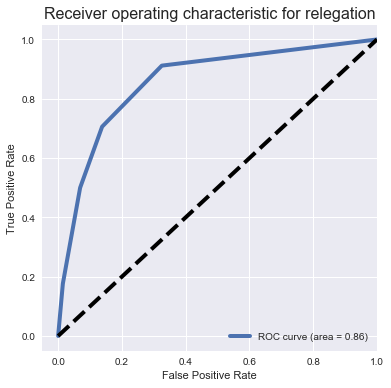


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=2, n_neighbors=5, p=2,
           weights='uniform')


In [80]:
knn = KNeighborsClassifier(n_neighbors=5,n_jobs=2)
knn.fit(X_train_pca, np.ravel(y_train))

# predicted test class:
y_pred = knn.predict(X_test_pca)

# predicted test probability:
y_pp = knn.predict_proba(X_test_pca)

print_scores_conmat('K-Nearest Neighbours (K=5)',y_test,y_pred)

print '\n'
roc_curve_raja(y_test,y_pp[:,1])

print '\n',knn

**COMMENTS:**  
For n=19 games, I tried 3, 5, 7, 9 and 11 for K to get the best results. Continue reading to see what I mean by 'best'. The copied and pasted results below are with and without upsampling. I noticed that precision decreases as recall increases - more and more samples are classified as relegation which helps recall but hinders precision. I therefore chose to concentrate on the f1-score to get a more senisble balance. No point having a model that correctly identifies relegation but creates a lot of false positives at the same time. The K's chosen below gave the best f1-scores.  

This is illustrated in the Receiver Operating Curve (ROC) as well. As the cut-off point for classifying relegation increases (lower probability threshold) the true positive rate (recall_1) goes up but so does the false positive rate (1-recall_0). The ROC curve is some way away from the perfect model curve, a line that starts at the origin, goes to top left corner and then to the top right corner in two straight lines. This perfect curve has an area under the curve of 1. The above curve has an area of 0.86 which indicates that the model is good but not excellent.

Upsampling led to a dramatic uplift in recall for relegation but caused recall for safety to drop by a significant amount too.

    Model: K-NEAREST NEIGHBOURS (K=5)

                           Predicted Safe  Predicted Relegated       Support
    Actual Safe                       189                   14           203
    Actual Relegated                   17                   17            34
    Total Predicted                   206                   31           237

    Baseline accuracy = 0.857
    Accuracy = 0.869

                Precision	Recall		F1-Score
    Safe	    0.917		0.931		0.924
    Relegated   0.548		0.500		0.523
    Average     0.865		0.869		0.867



    Model: K-NEAREST NEIGHBOURS (K=11) WITH UPSAMPLING

                           Predicted Safe  Predicted Relegated       Support
    Actual Safe                       149                   54           203
    Actual Relegated                    2                   32            34
    Total Predicted                   151                   86           237

    Baseline accuracy = 0.857
    Accuracy = 0.764

                Precision	Recall		F1-Score
    Safe		0.987		0.734		0.842
    Relegated   0.372		0.941		0.533
    Average     0.899		0.764		0.798

### Random Forest Classifier

Model: (DEFAULT) RANDOM FOREST

                       Predicted Safe  Predicted Relegated       Support
Actual Safe                       199                    4           203
Actual Relegated                   21                   13            34
Total Predicted                   220                   17           237

Baseline accuracy = 0.857
Accuracy = 0.895

		Precision	Recall		F1-Score
Safe		0.905		0.980		0.941
Relegated	0.765		0.382		0.510
Average		0.884		0.895		0.879




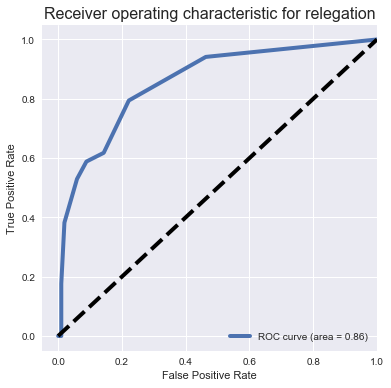



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)


In [81]:
rfc = RandomForestClassifier()

rfc.fit(X_train_pca, np.ravel(y_train))


# predicted test class:
y_pred = rfc.predict(X_test_pca)

# predicted test probability:
y_pp = rfc.predict_proba(X_test_pca)

print_scores_conmat('(Default) Random Forest',y_test,y_pred)
print '\n'
roc_curve_raja(y_test,y_pp[:,1])
print '\n'
print rfc

### Support Vector Machine Classifier with Gridsearch

Model: (DEFAULT) SVC

                       Predicted Safe  Predicted Relegated       Support
Actual Safe                       240                    8           248
Actual Relegated                   43                    6            49
Total Predicted                   283                   14           297

Baseline accuracy = 0.835
Accuracy = 0.828

		Precision	Recall		F1-Score
Safe		0.848		0.968		0.904
Relegated	0.429		0.122		0.190
Average		0.779		0.828		0.786




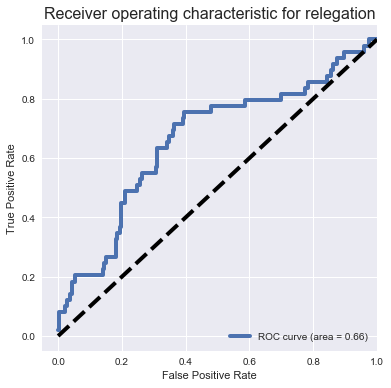



SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [46]:
svc = SVC(probability=True)

svc.fit(X_train_pca, np.ravel(y_train))


# predicted test class:
y_pred = svc.predict(X_test_pca)

# predicted test probability:
y_pp = svc.predict_proba(X_test_pca)

print_scores_conmat('(Default) SVC',y_test,y_pred)
print '\n'
roc_curve_raja(y_test,y_pp[:,1])
print '\n'
print svc

In [97]:
svc_params = {
    'C':np.logspace(-3, 2, 6),
    'gamma':np.logspace(-5, 2, 8),
    'kernel':['linear','rbf']
}

svc_gs = GridSearchCV(SVC(probability=True), svc_params, cv=5, verbose=1,scoring='f1',n_jobs=2)
svc_gs.fit(X_train_pca, np.ravel(y_train))

Fitting 5 folds for each of 96 candidates, totalling 480 fits


/Users/rajabr/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/rajabr/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
[Parallel(n_jobs=2)]: Done 480 out of 480 | elapsed:   22.5s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=2,
       param_grid={'kernel': ['linear', 'rbf'], 'C': array([  1.00000e-03,   1.00000e-02,   1.00000e-01,   1.00000e+00,
         1.00000e+01,   1.00000e+02]), 'gamma': array([  1.00000e-05,   1.00000e-04,   1.00000e-03,   1.00000e-02,
         1.00000e-01,   1.00000e+00,   1.00000e+01,   1.00000e+02])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1', verbose=1)

In [98]:
best_svc = svc_gs.best_estimator_
print svc_gs.best_params_
print svc_gs.best_score_

{'kernel': 'linear', 'C': 0.10000000000000001, 'gamma': 1.0000000000000001e-05}
0.742206882221


Model: BEST SVC FROM GRIDSEARCH OPTIMISED FOR F1-SCORE

                       Predicted Safe  Predicted Relegated       Support
Actual Safe                       189                   14           203
Actual Relegated                   16                   18            34
Total Predicted                   205                   32           237

Baseline accuracy = 0.857
Accuracy = 0.873

		Precision	Recall		F1-Score
Safe		0.922		0.931		0.926
Relegated	0.562		0.529		0.545
Average		0.870		0.873		0.872




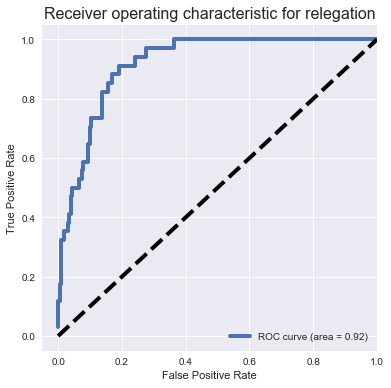

In [99]:
best_svc.fit(X_train_pca, np.ravel(y_train))
y_pred = best_svc.predict(X_test_pca)
y_pp = best_svc.predict_proba(X_test_pca)
print_scores_conmat('Best SVC from gridsearch optimised for f1-score',y_test,y_pred)
print '\n'
roc_curve_raja(y_test,y_pp[:,1])
print '\n'


### The Bottom Three model

In [30]:
y_pred=[1 if x>=18 else 0 for x in X_test['Position']]
print_scores_conmat('Bottom Three Relegated',y_test,y_pred)



Model: BOTTOM THREE RELEGATED

                       Predicted Safe  Predicted Relegated       Support
Actual Safe                       217                   31           248
Actual Relegated                   33                   16            49
Total Predicted                   250                   47           297

Baseline accuracy = 0.835
Accuracy = 0.785

		Precision	Recall		F1-Score
Safe		0.868		0.875		0.871
Relegated	0.340		0.327		0.333
Average		0.781		0.785		0.783


### The Baseline Model for Completeness

In [86]:
y_pred=[0 for x in X_test['Position']]
print_scores_conmat('Baseline',y_test,y_pred)



Model: BASELINE

                       Predicted Safe  Predicted Relegated       Support
Actual Safe                       203                    0           203
Actual Relegated                   34                    0            34
Total Predicted                   237                    0           237

Baseline accuracy = 0.857
Accuracy = 0.857

		Precision	Recall		F1-Score
Safe		0.857		1.000		0.923
Relegated	0.000		0.000		0.000
Average		0.734		0.857		0.790


## SECTION THREE

### Repeat above analysis for all games in a season
The function below recreates the Section Two analysis for all games in a season by cycling through n=1 to 38. For each n it saves the recall and precision scores and displays these in a chart at the end.

In [87]:
# Divide the full feature set into four, so that we can experiment with fetures and model performance
feature_list1=['Played','Against', 'Drawn', 'For', 'GD', 'Lost', 'Points','Won']
feature_list2=['Pts_0','Pts_1','Pts_2','Pts_3','Pts_4']
feature_list4=['Position','GamesDelta_Pos1A','GamesDelta_Pos2A','GamesDelta_Pos1B','GamesDelta_Pos2B',
            'PtsDelta_Pos1A','PtsDelta_Pos2A','PtsDelta_Pos1B','PtsDelta_Pos2B']
feature_list8=['Position_SeaM1','Position_SeaM2','Position_SeaM3','Promoted_SeaM1']

# List of metrics calculated and output for each of the n=1 to 38 models
output_cols=['TN', 'FN', 'FP', 'TP', 'baseline', 'accuracy', 'precision_0', 'precision_1', 'recall_0', 'recall_1','f1_0','f1_1']

In [88]:
first_train_season=1995
first_test_season=2010    
target_list=['Relegated']

In [89]:
def recall_chart(description="Whoops!",model=LogisticRegression(),
                 features_choice=0b0001,upsample=False,normalise=True,perform_PCA=True,bottom3_model=False):

    if (features_choice & 0b1)==1:
        feature_list=list(feature_list1)
    else:
        feature_list=[]
    if (features_choice & 0b10)==2:
        feature_list+=feature_list2
    if ((features_choice & 0b100)==4 or bottom3_model):
        feature_list+=feature_list4
    if (features_choice & 0b1000)==8:
        feature_list+=feature_list8

    output=pd.DataFrame(index=output_cols)

    for games_played in range(1,39):

        table=feature_dict[str(games_played)]

        table_train=table[[(x>=first_train_season and x<first_test_season) for x in table['Season']]]
        table_test=table[table['Season']>=first_test_season]

        if upsample:
            from sklearn.utils import resample
            table_train_r=table_train[table_train['Relegated']==1]
            table_train_s=table_train[table_train['Relegated']==0]

            table_train_r_upsample = resample(table_train_r, replace=True, n_samples=table_train_s.shape[0])
            table_train=pd.concat([table_train_r_upsample,table_train_s],axis=0)

        X_train=table_train[feature_list]
        y_train=table_train[target_list]
        X_test=table_test[feature_list]
        y_test=table_test[target_list]

        if normalise:
            StdSclr=StandardScaler()
            X_train_norm=StdSclr.fit_transform(X_train)
            X_test_norm=StdSclr.transform(X_test)
        else:
            X_train_norm=X_train
            X_test_norm=X_test

        if perform_PCA:
            pca = PCA()
            pca.fit(X_train_norm)
            X_train_pca=pca.transform(X_train_norm)
            X_test_pca=pca.transform(X_test_norm)
            X_train_pca=pd.DataFrame(X_train_pca,columns=['PC_'+str(x+1) for x in range(X_train_pca.shape[1])])
            X_test_pca=pd.DataFrame(X_test_pca,columns=['PC_'+str(x+1) for x in range(X_test_pca.shape[1])])
        else:
            X_train_pca=X_train_norm
            X_test_pca=X_test_norm

        if bottom3_model:
            y_pred = [1 if x>=18 else 0 for x in X_test['Position']]
        else: 
            model.fit(X_train_pca, np.ravel(y_train))
            y_pred = model.predict(X_test_pca)
        result=np.array(scores_conmat(y_test,y_pred))
        output[games_played]=result

    fig, ax = plt.subplots(figsize=(8,6))
    plt.plot(output.loc['recall_1'],label="recall - relegated",lw=3,c='r')
    plt.plot(output.loc['recall_0'],label="recal - safe",lw=2, c='b')
    plt.plot(output.loc['precision_1'],label="precision - relegated",lw=3,c='r',ls="--",alpha=.6)
    plt.plot(output.loc['precision_0'],label="precision - safe",lw=2,c='b',ls="--",alpha=0.6)
    plt.xlabel("Number of games played in the season so far")
    plt.ylim([0,1.05])
    plt.legend(loc='lower right')
    plt.title(description)
    plt.show()
    return

### Logistic Regression Classifier

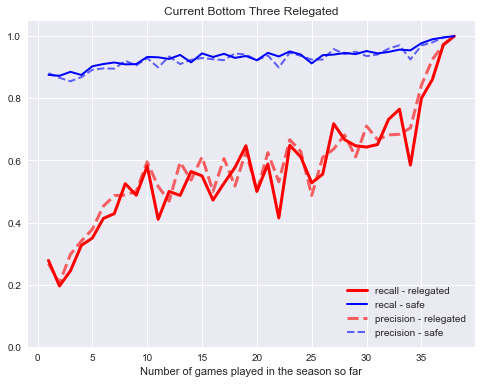

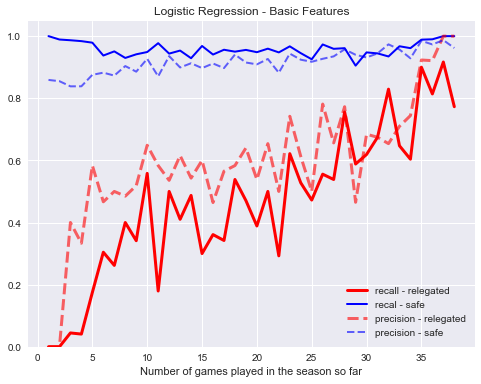

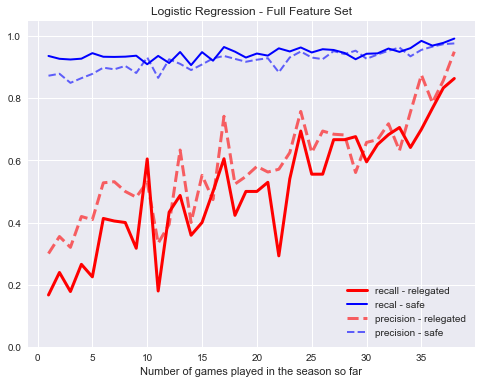

In [90]:
recall_chart("Current Bottom Three Relegated",bottom3_model=True)
recall_chart("Logistic Regression - Basic Features",LogisticRegression(),
             features_choice=0b0001,upsample=False,normalise=True,perform_PCA=True,bottom3_model=False)
recall_chart("Logistic Regression - Full Feature Set",LogisticRegression(),
             features_choice=0b1111,upsample=False,normalise=True,perform_PCA=True,bottom3_model=False)

### K-Nearest Neighbours

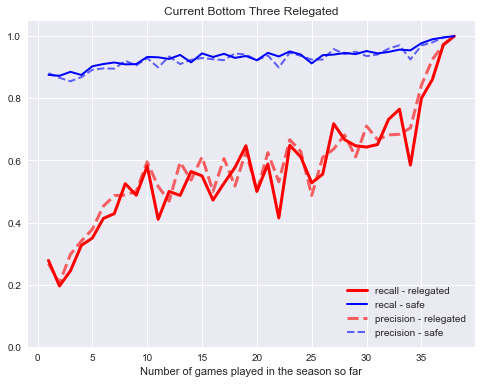

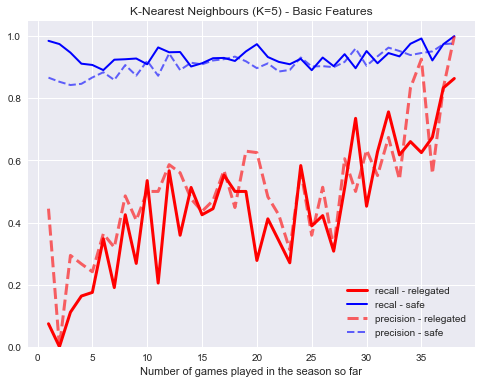

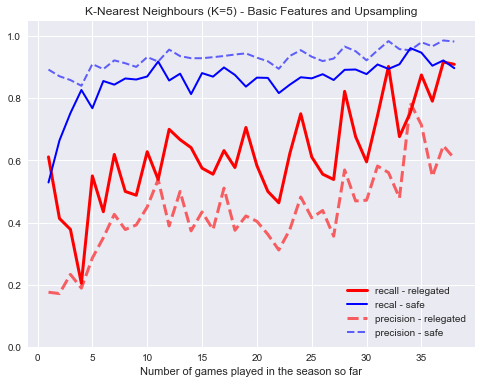

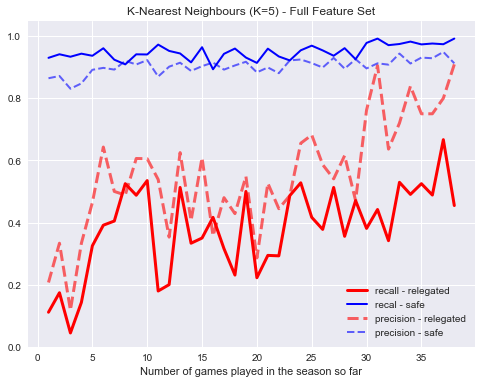

In [91]:
recall_chart("Current Bottom Three Relegated",bottom3_model=True)
recall_chart("K-Nearest Neighbours (K=5) - Basic Features",KNeighborsClassifier(n_neighbors=5),
             features_choice=0b0001,upsample=False,normalise=True,perform_PCA=True,bottom3_model=False)
recall_chart("K-Nearest Neighbours (K=5) - Basic Features and Upsampling",KNeighborsClassifier(n_neighbors=5),
             features_choice=0b0001,upsample=True,normalise=True,perform_PCA=True,bottom3_model=False)
recall_chart("K-Nearest Neighbours (K=5) - Full Feature Set",KNeighborsClassifier(n_neighbors=5),
             features_choice=0b1111,upsample=False,normalise=True,perform_PCA=True,bottom3_model=False)

### SVM Classifier using Gridsearch Parameters from Section Two

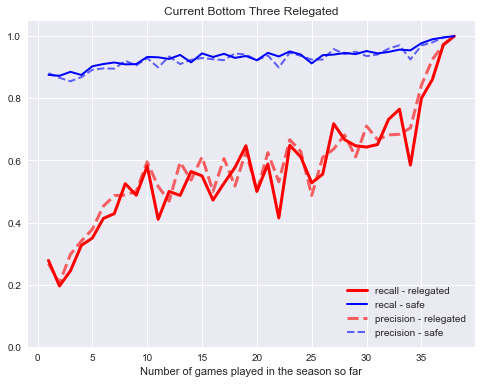

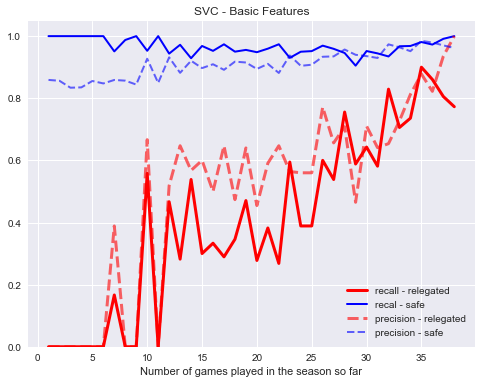

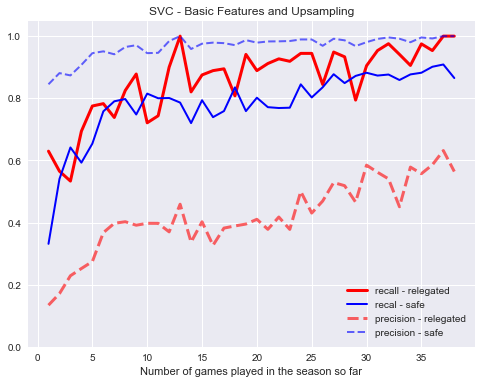

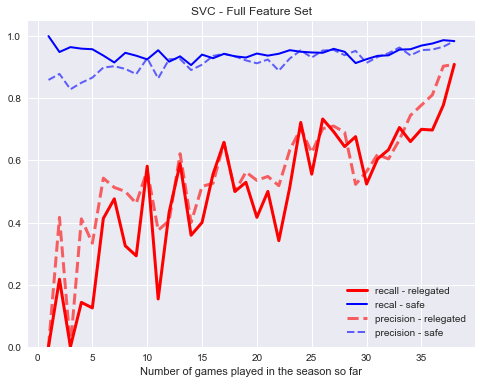

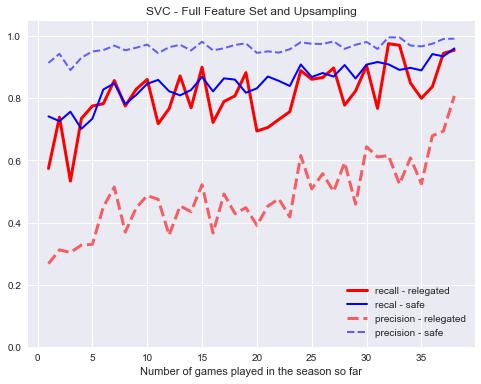

In [105]:
recall_chart("Current Bottom Three Relegated",bottom3_model=True)
recall_chart("SVC - Basic Features",SVC(kernel='linear', C= 0.1, gamma=1e-05),
             features_choice=0b0001,upsample=False,normalise=True,perform_PCA=True,bottom3_model=False)
recall_chart("SVC - Basic Features and Upsampling",SVC(kernel='linear', C= 0.1, gamma=1e-05),
             features_choice=0b0001,upsample=True,normalise=True,perform_PCA=True,bottom3_model=False)
recall_chart("SVC - Full Feature Set",SVC(kernel='linear', C= 0.1, gamma=1e-05),
             features_choice=0b1111,upsample=False,normalise=True,perform_PCA=True,bottom3_model=False)
recall_chart("SVC - Full Feature Set and Upsampling",SVC(kernel='linear', C= 0.1, gamma=1e-05),
             features_choice=0b1111,upsample=True,normalise=True,perform_PCA=True,bottom3_model=False)

### Random Forest Classifier

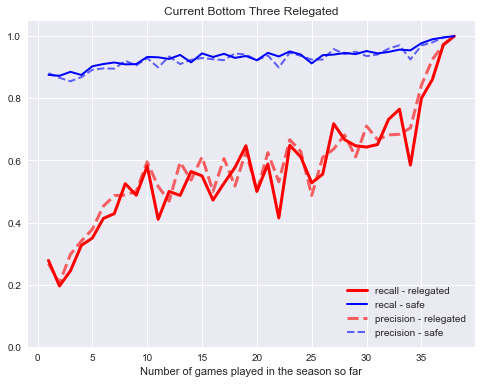

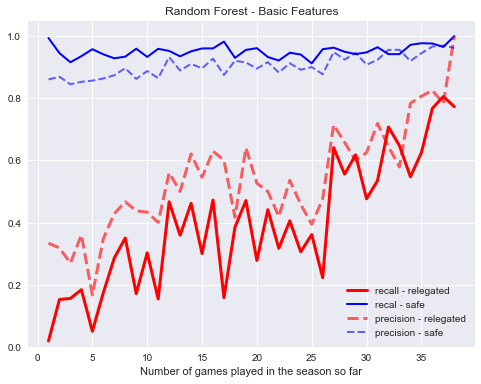

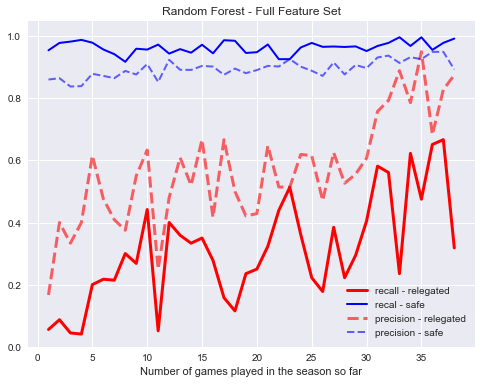

In [93]:
recall_chart("Current Bottom Three Relegated",bottom3_model=True)
recall_chart("Random Forest - Basic Features",RandomForestClassifier(),
             features_choice=0b0001,upsample=False,normalise=True,perform_PCA=True,bottom3_model=False)

recall_chart("Random Forest - Full Feature Set",RandomForestClassifier(),
             features_choice=0b1111,upsample=False,normalise=True,perform_PCA=True,bottom3_model=False)



### Observations

* In general, recall and precision (for both relegation and safety) increase as the number of games remaining dcerease
* By eye, the BTM beats the machine learning models on f1-score (average of precision and recall)
* Upsampling improves relegation recall but reduces safety recall.

### NEXT STEPS 
* Do it for this season after 4 games. Will Bournemouth be relegated?  
* Is it possible to use data from before 1995 in which 3 out of 22 teams were relegated to predict 3 out of 20 teams?  
* Apply the model to all teams in the league. Identify the three teams with the highest probability of relegation and classify these teams as relegated.  
* Use a subest of the PCA components rather than the full set.  
* Allow for optimisation of hyperparameters in Section Three.